In [1]:
states = ['LA', 'MS', 'AL', 'GA']
district_types = ['SS','SH']
minority = 'Black'
deviation = 0.10      # 0.10 means 10% means +/-5%
total_steps = 100000 # SHORT BURST STEPS
burst_length = 10
num_bursts = round( total_steps / burst_length )

In [2]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, accept, Election)
from gerrychain import constraints as constraints_class
from gerrychain.optimization import SingleMetricOptimizer, Gingleator
from functools import partial
import pandas as pd
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random

random.seed(2024)

In [3]:
import math
import networkx as nx

from number_of_districts import number_of_districts
from complete import recursive_bipartition_heuristic
from district import get_census_codes
from metrics import number_of_counties_split, number_of_county_splits, average_polsby_popper, report_metrics

codes = get_census_codes(minority)
filepath = 'C:\\districting-data-2020-reprojection\\'


*****************************************
Generating seed plan for LA SS vtd
*****************************************

number of nodes, edges: 3540 9889
Effectively using k, L, U = 39 113459 125401
Using one split county, attempting to bipartition cluster into sizes: 19 20
Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16


C:\Users\buchanan\OneDrive - Oklahoma A and M System\Code\polsby_popper_polished\Polsby_Popper_optimization\src\revision\district.py:179: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  m.addConstr( gp.quicksum( is_split ) <= split_counties_limit )


Using one split county, attempting to bipartition cluster into sizes: 10 10
Using one split county, attempting to bipartition cluster into sizes: 5 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 5 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting t

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [59:24<00:00, 28.05it/s]


i gingles pp s1 s2
0 4.4428 0.3213 23 39
1000 6.4989 0.2036 51 103
2000 7.4767 0.2029 59 111
3000 8.4434 0.1857 58 113
4000 8.4628 0.2108 53 110
5000 9.4277 0.1918 53 107
6000 9.4834 0.2073 53 104
7000 10.413 0.2027 49 95
8000 10.4739 0.1972 54 102
9000 11.4039 0.215 53 95
10000 11.4083 0.1962 55 105
11000 11.4306 0.1893 55 104
12000 11.4423 0.1844 56 107
13000 11.4501 0.1802 53 106
14000 11.4501 0.204 48 89
15000 11.4557 0.1666 53 107
16000 11.4573 0.2004 52 101
17000 11.4573 0.2143 51 99
18000 11.4626 0.2122 51 103
19000 11.4897 0.2118 53 102
20000 11.4953 0.204 50 97
21000 11.4961 0.2205 52 92
22000 11.4961 0.2058 53 95
23000 12.3902 0.1838 56 108
24000 12.3964 0.2013 53 103
25000 12.4301 0.1902 53 102
26000 12.4341 0.1885 56 106
27000 12.4341 0.1951 56 105
28000 12.4382 0.2094 52 100
29000 12.4626 0.1925 51 106
30000 12.4639 0.2051 54 107
31000 12.4694 0.1749 56 107
32000 12.474 0.1981 52 105
33000 12.4759 0.1908 51 105
34000 12.4767 0.2211 50 94
35000 12.4767 0.2008 52 100
36000 1

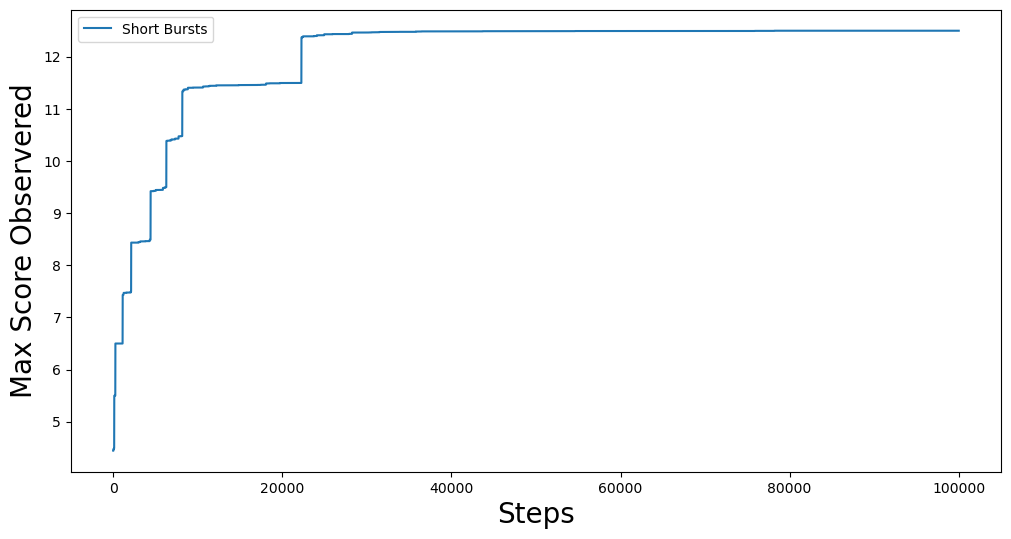

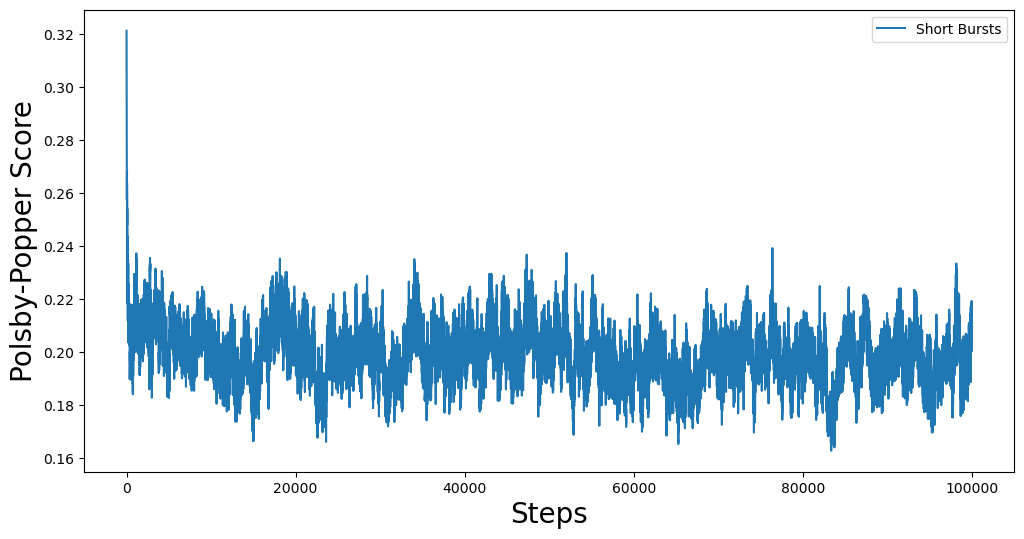

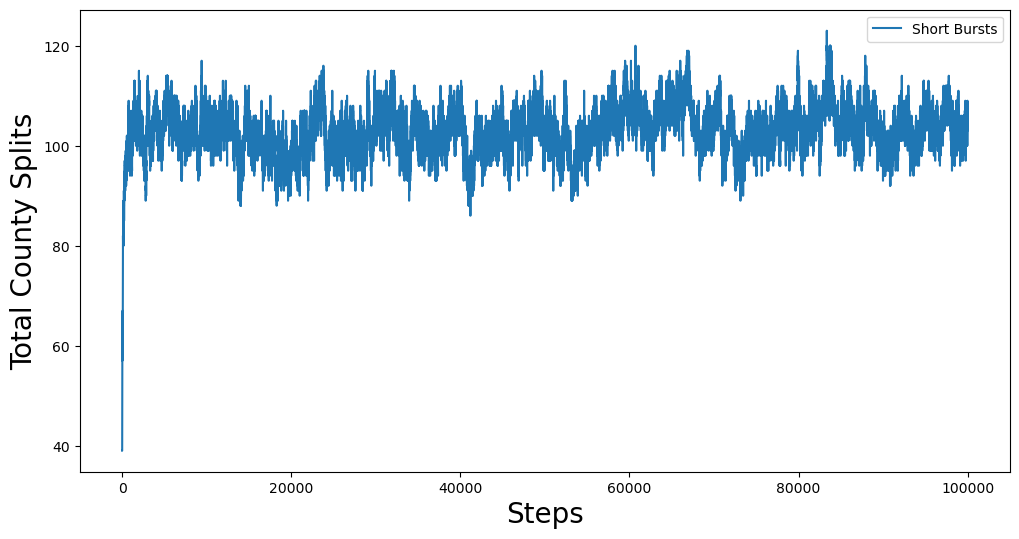


*****************************************
Starting short bursts for LA SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [54:38<00:00, 30.50it/s]


i gingles pp s1 s2
0 4.4428 0.3213 23 39
1000 7.4729 0.2656 28 42
2000 8.4715 0.2537 27 46
3000 8.4901 0.2533 31 52
4000 8.4914 0.2873 29 45
5000 8.4934 0.2741 29 44
6000 8.4934 0.2618 25 44
7000 8.4943 0.2673 26 41
8000 8.4978 0.2437 30 51
9000 8.4978 0.2611 26 45
10000 8.4978 0.2591 29 50
11000 9.4241 0.2601 28 47
12000 9.4354 0.2591 30 51
13000 9.4449 0.2629 31 52
14000 9.4541 0.2749 28 49
15000 9.4689 0.2861 28 48
16000 9.4689 0.2705 31 50
17000 9.4855 0.2754 32 53
18000 10.4288 0.2564 31 53
19000 10.4374 0.2643 29 52
20000 10.4456 0.2705 27 47
21000 10.4587 0.253 27 44
22000 10.4743 0.2748 28 47
23000 10.4743 0.2546 25 50
24000 10.4745 0.2679 27 50
25000 10.4848 0.2467 25 47
26000 10.4901 0.2712 25 50
27000 11.3942 0.2514 36 54
28000 11.4197 0.2615 31 53
29000 11.4197 0.2528 31 52
30000 11.4197 0.2665 29 50
31000 11.4224 0.2594 27 48
32000 11.4265 0.2624 31 53
33000 11.4321 0.2551 29 52
34000 11.4321 0.248 29 49
35000 11.4321 0.262 26 48
36000 11.4347 0.2704 32 52
37000 11.4347 0.

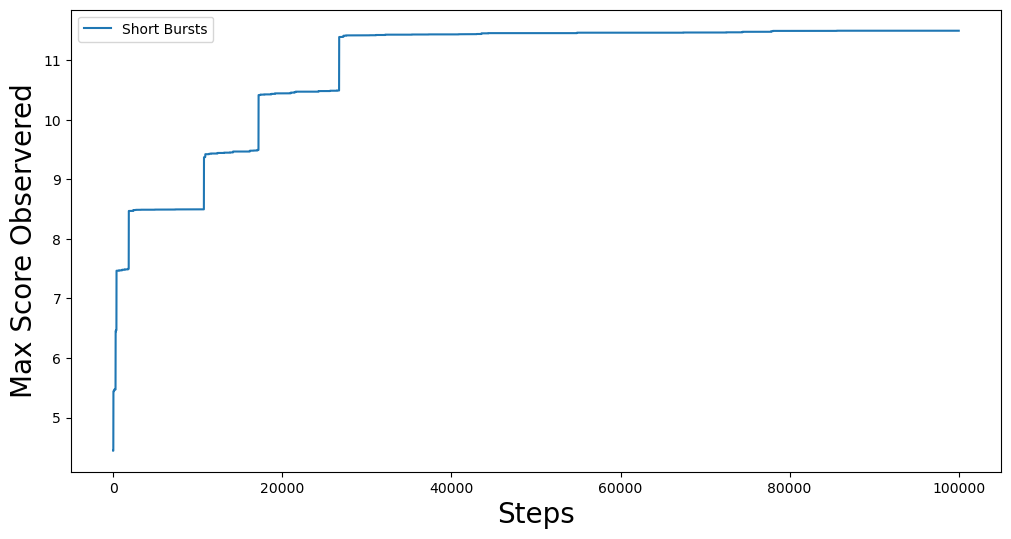

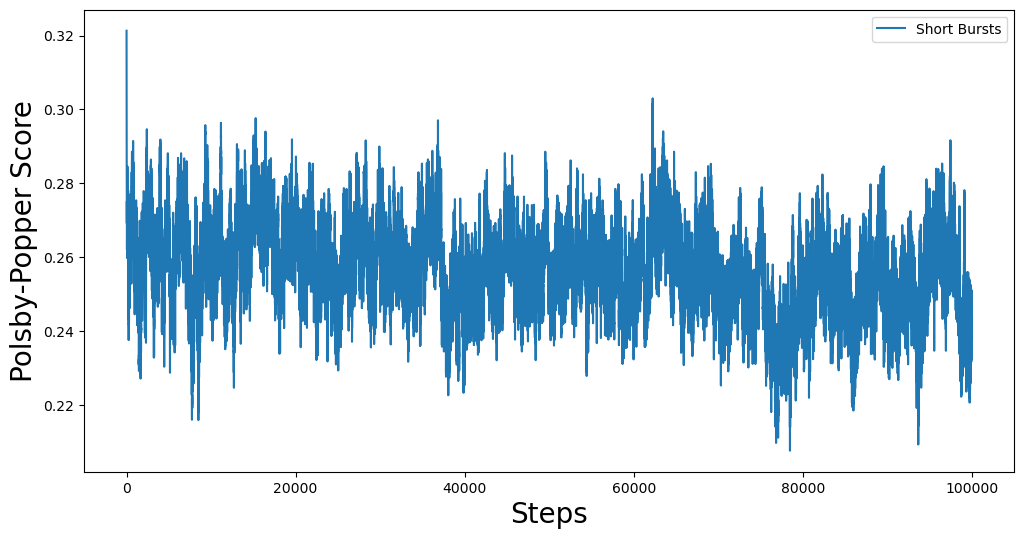

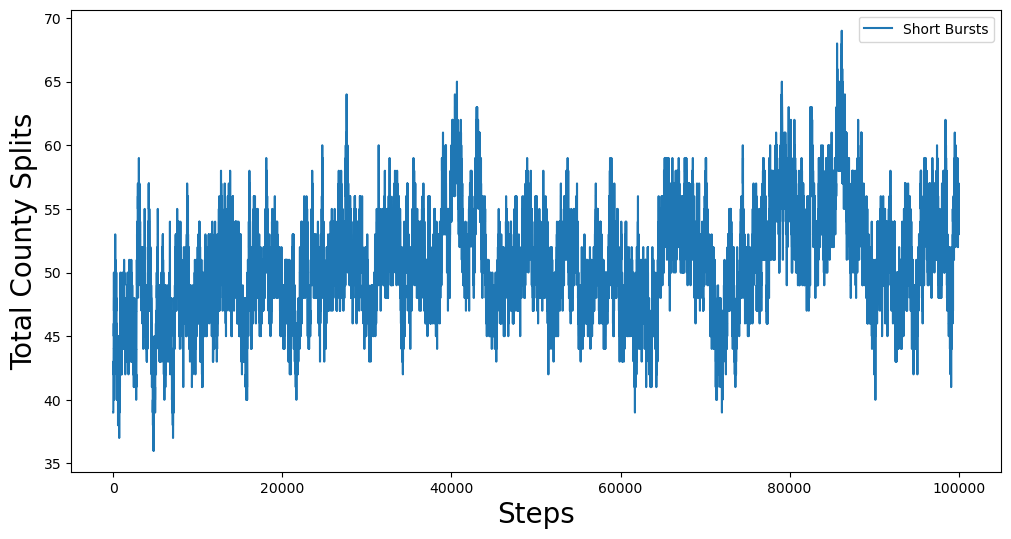


*****************************************
Generating seed plan for LA SH blockgroup
*****************************************

number of nodes, edges: 4294 11880
Effectively using k, L, U = 105 42142 46577
Using one split county, attempting to bipartition cluster into sizes: 52 53
Using one split county, attempting to bipartition cluster into sizes: 26 27
Using one split county, attempting to bipartition cluster into sizes: 13 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartiti

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [45:18<00:00, 36.79it/s]


i gingles pp s1 s2
0 15.4951 0.3509 38 104
1000 20.4818 0.2489 55 169
2000 21.4828 0.2482 59 178
3000 25.4722 0.2473 57 187
4000 25.4976 0.2409 57 181
5000 27.4995 0.2474 57 179
6000 28.4732 0.2565 58 182
7000 28.4867 0.2539 59 190
8000 29.4216 0.2417 59 196
9000 29.4459 0.2512 59 194
10000 30.4284 0.2578 59 191
11000 30.4399 0.2546 61 191
12000 30.4523 0.2537 60 192
13000 30.457 0.2416 58 193
14000 30.457 0.2435 59 188
15000 30.4676 0.2524 56 187
16000 30.4676 0.2526 60 188
17000 30.468 0.2505 58 191
18000 30.4843 0.2392 57 194
19000 30.4843 0.2596 55 190
20000 30.4843 0.2519 59 190
21000 30.4843 0.2336 60 195
22000 30.491 0.2366 56 189
23000 30.491 0.2368 60 194
24000 30.491 0.2505 59 194
25000 30.491 0.2545 56 190
26000 30.4935 0.254 57 191
27000 30.4935 0.2499 58 189
28000 30.5 0.2459 59 194
29000 30.5 0.2515 58 190
30000 30.5 0.2378 61 211
31000 30.5 0.2389 60 198
32000 30.5 0.2425 60 193
33000 31.4218 0.2467 60 196
34000 31.4769 0.2407 58 187
35000 32.3932 0.2504 59 191
36000 33.

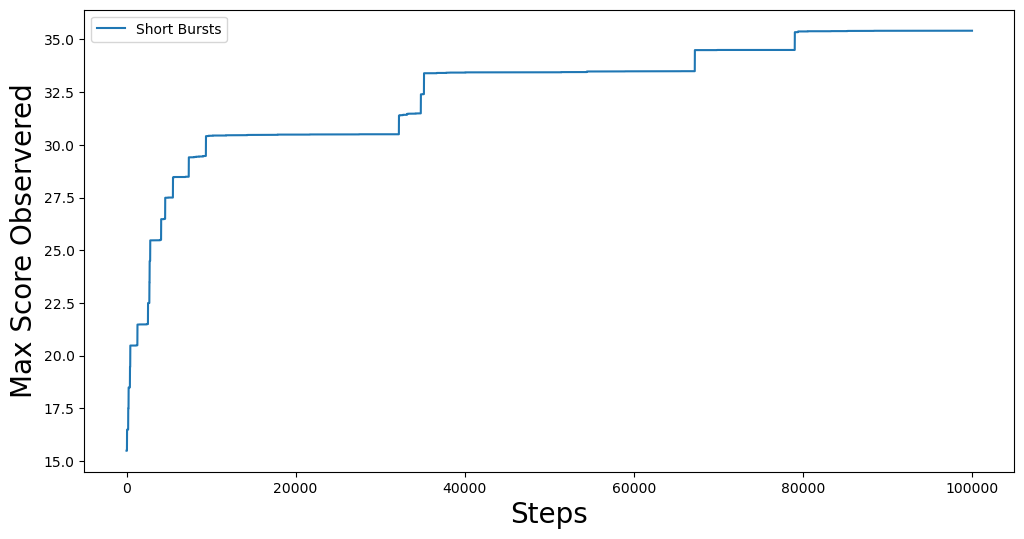

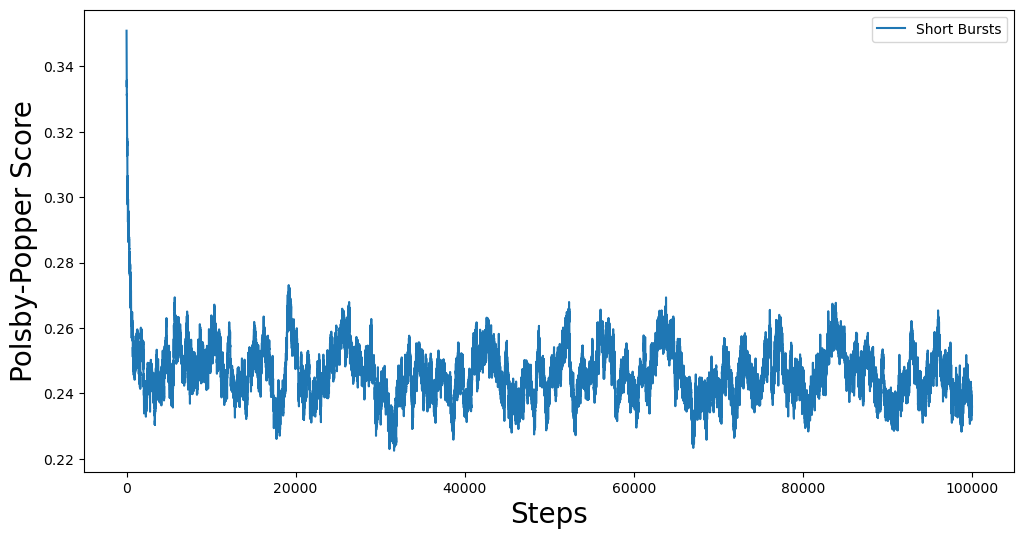

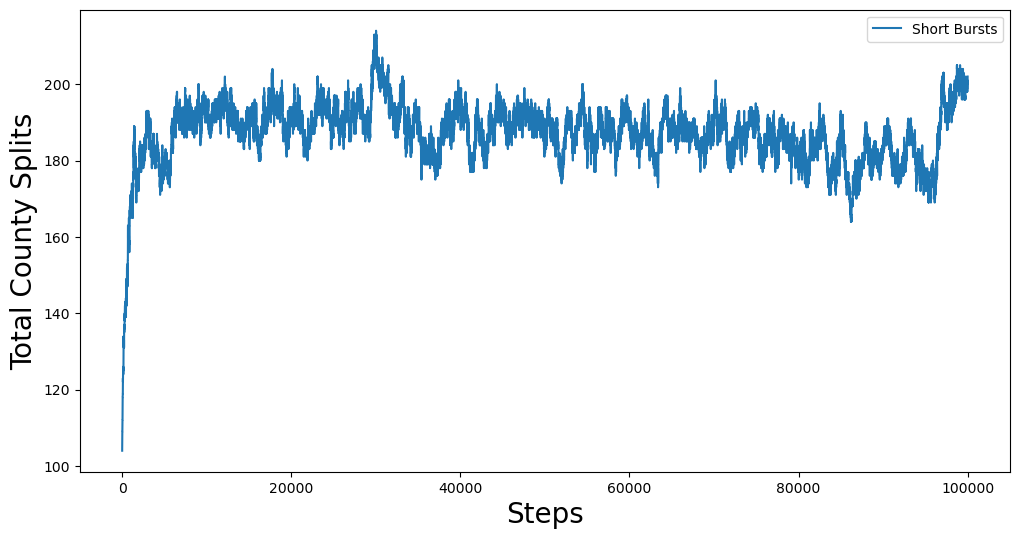


*****************************************
Starting short bursts for LA SH blockgroup
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [40:44<00:00, 40.90it/s]


i gingles pp s1 s2
0 15.4951 0.3509 38 104
1000 23.4664 0.2752 39 113
2000 25.4839 0.2717 43 114
3000 27.4884 0.2694 41 116
4000 27.4884 0.2637 42 116
5000 27.4884 0.2725 41 115
6000 27.4884 0.2735 41 120
7000 28.4978 0.276 42 124
8000 29.4722 0.2672 44 125
9000 29.4722 0.2788 40 121
10000 29.4751 0.2782 43 124
11000 29.4751 0.2671 42 128
12000 29.478 0.2806 42 118
13000 29.478 0.27 41 121
14000 29.478 0.2685 40 118
15000 29.478 0.2664 43 122
16000 29.4849 0.2727 43 125
17000 29.4849 0.266 38 118
18000 29.4849 0.2685 39 122
19000 29.4849 0.2818 40 124
20000 30.4849 0.2863 42 124
21000 30.4855 0.2884 40 116
22000 30.4855 0.2835 40 116
23000 30.4855 0.2703 42 122
24000 30.4855 0.2913 42 121
25000 30.4905 0.2895 40 123
26000 30.4905 0.2691 43 123
27000 30.4905 0.263 43 116
28000 30.4905 0.2749 45 118
29000 30.4905 0.2712 44 126
30000 31.4905 0.283 44 125
31000 31.4905 0.2831 41 126
32000 31.4963 0.2945 41 119
33000 31.4963 0.2861 41 121
34000 31.4963 0.2771 40 120
35000 32.3828 0.2905 46 

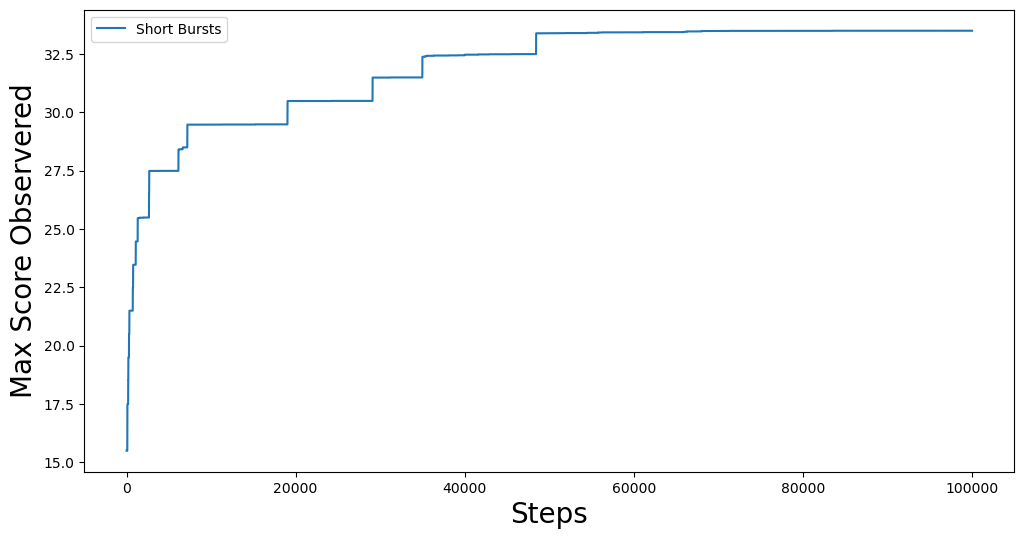

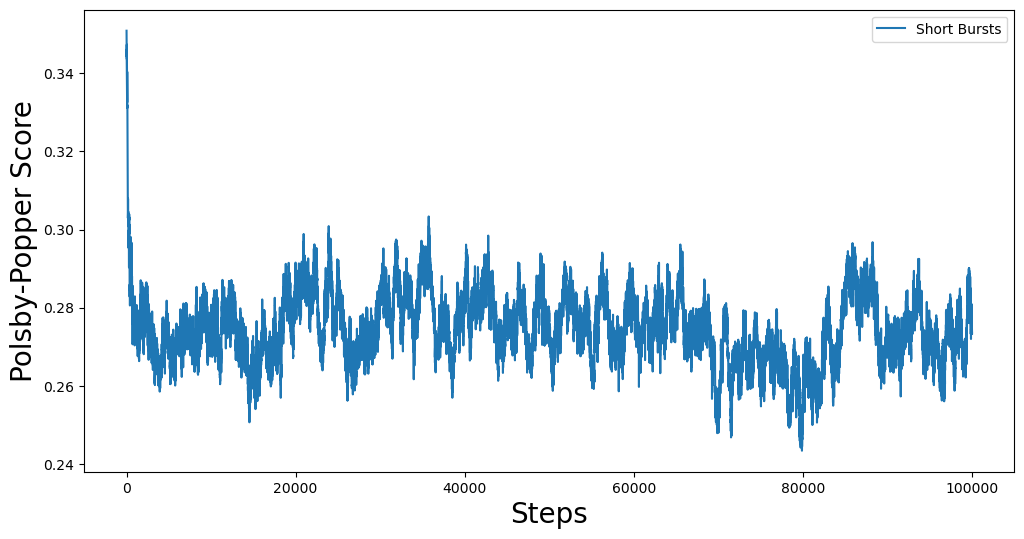

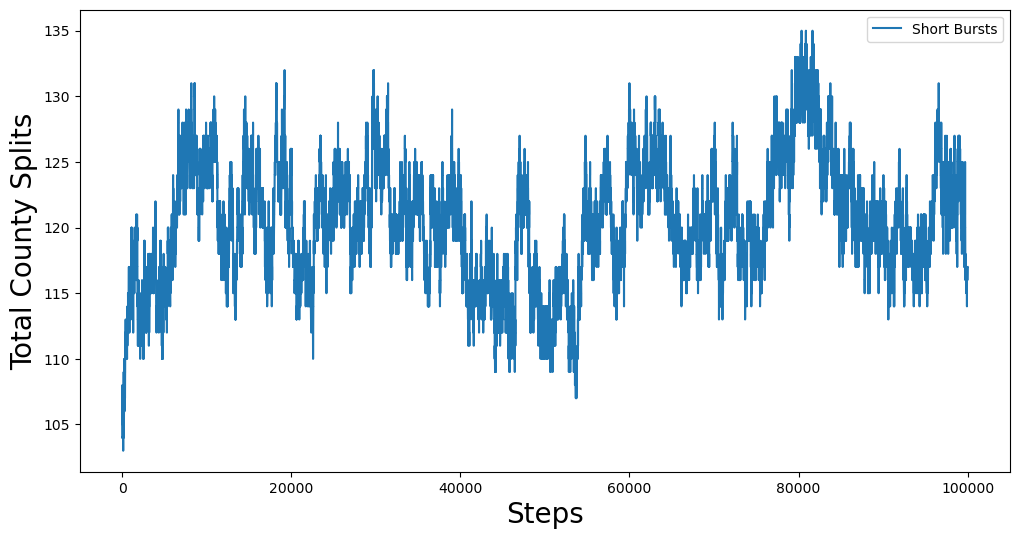


*****************************************
Generating seed plan for MS SS vtd
*****************************************

number of nodes, edges: 1834 5221
Effectively using k, L, U = 52 54101 59795
Using one split county, attempting to bipartition cluster into sizes: 26 26
Using one split county, attempting to bipartition cluster into sizes: 13 13
Using one split county, attempting to bipartition cluster into sizes: 6 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster 

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [28:12<00:00, 59.10it/s]


i gingles pp s1 s2
0 10.4854 0.3598 32 51
1000 11.4952 0.2438 68 124
2000 15.4713 0.2189 70 132
3000 16.4895 0.2185 70 126
4000 16.4994 0.2222 67 127
5000 16.4994 0.2241 64 140
6000 17.4918 0.2149 68 131
7000 17.4978 0.2262 66 126
8000 17.4978 0.2251 68 136
9000 19.445 0.2203 72 137
10000 19.4697 0.2179 70 136
11000 20.4802 0.2377 69 126
12000 20.4808 0.2101 73 136
13000 20.4949 0.2135 69 140
14000 20.4949 0.2144 69 128
15000 20.4949 0.2223 70 136
16000 21.4399 0.2057 72 137
17000 21.4732 0.194 70 134
18000 21.4732 0.1988 67 124
19000 21.4736 0.2004 65 131
20000 21.4808 0.2094 66 130
21000 21.4877 0.2171 73 128
22000 21.4999 0.2157 70 127
23000 22.421 0.2002 68 127
24000 22.4434 0.2212 68 126
25000 22.4434 0.2054 69 130
26000 22.4434 0.2042 71 128
27000 22.4761 0.2115 68 131
28000 22.4773 0.2265 69 125
29000 22.4773 0.2127 73 137
30000 22.4787 0.2133 67 133
31000 22.4834 0.2135 65 124
32000 23.4123 0.201 69 129
33000 23.4162 0.2068 69 133
34000 23.4162 0.2096 69 136
35000 23.4365 0.218

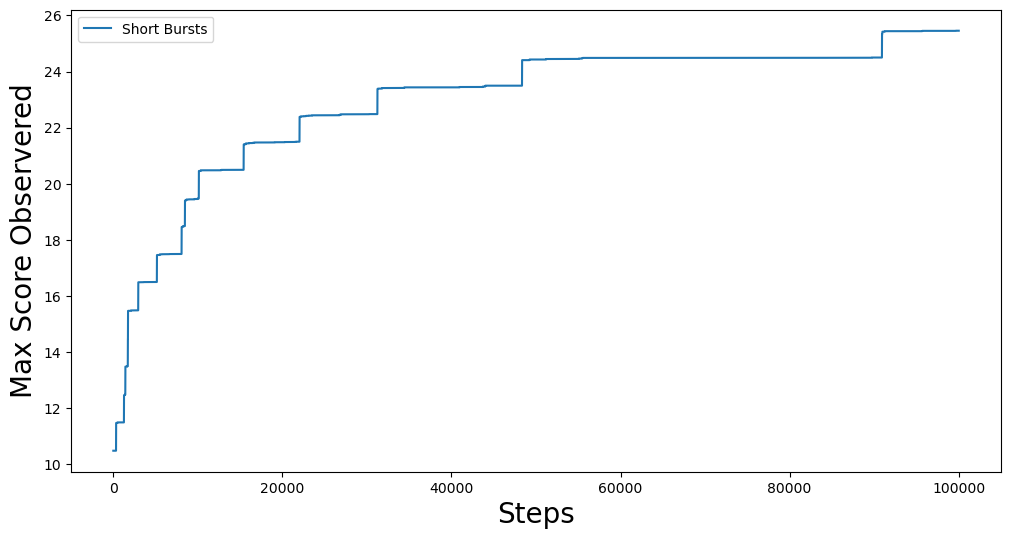

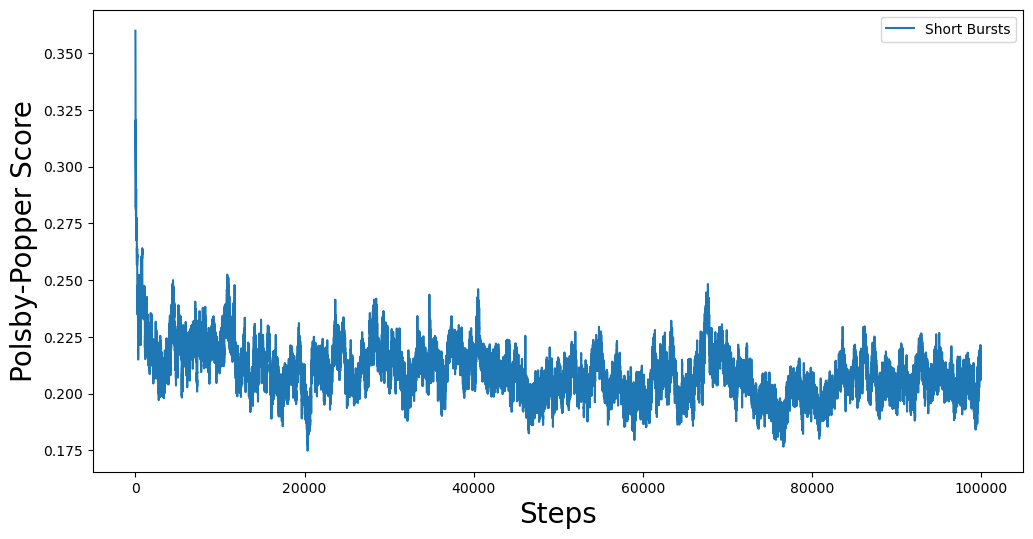

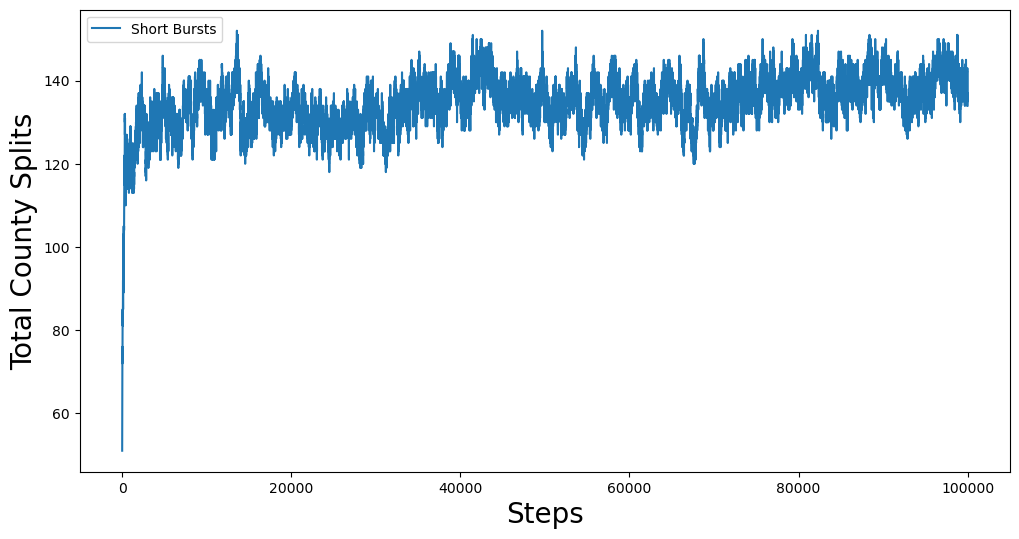


*****************************************
Starting short bursts for MS SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [25:08<00:00, 66.27it/s]


i gingles pp s1 s2
0 10.4854 0.3598 32 51
1000 14.4898 0.3013 34 55
2000 14.4898 0.2747 42 66
3000 14.4898 0.2925 41 62
4000 15.4898 0.2814 43 63
5000 15.4898 0.2883 44 60
6000 15.4898 0.3058 40 54
7000 15.4898 0.3018 36 56
8000 15.4898 0.2943 40 62
9000 15.4898 0.326 31 49
10000 16.4898 0.3087 41 59
11000 17.4255 0.3004 43 64
12000 17.4836 0.284 44 67
13000 17.4962 0.2938 38 60
14000 18.4267 0.2918 47 68
15000 18.4354 0.2898 45 67
16000 18.4478 0.2911 43 63
17000 18.4567 0.2827 47 66
18000 18.4567 0.2899 45 64
19000 18.4567 0.2993 42 64
20000 18.4567 0.2763 47 65
21000 18.4567 0.2852 43 66
22000 18.4734 0.2861 41 62
23000 18.4734 0.2887 46 67
24000 18.4734 0.3158 40 57
25000 18.4734 0.3085 37 57
26000 18.4734 0.2778 45 67
27000 18.4823 0.29 37 64
28000 18.4823 0.2936 42 70
29000 18.4875 0.2858 41 65
30000 18.4908 0.3004 39 60
31000 19.4064 0.3089 41 61
32000 19.419 0.291 41 63
33000 19.4404 0.3005 35 55
34000 19.475 0.285 38 60
35000 19.483 0.3044 41 60
36000 19.483 0.2878 40 63
37000

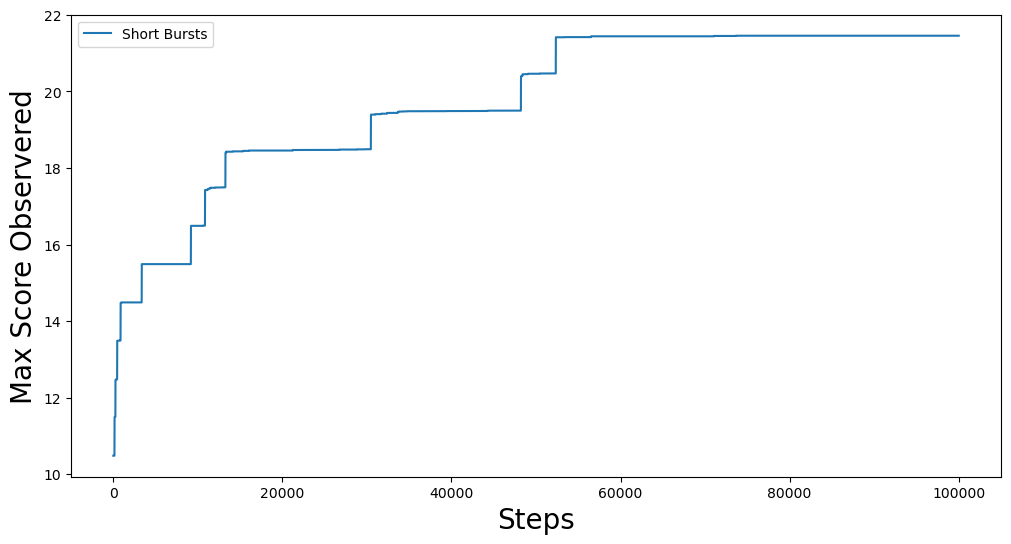

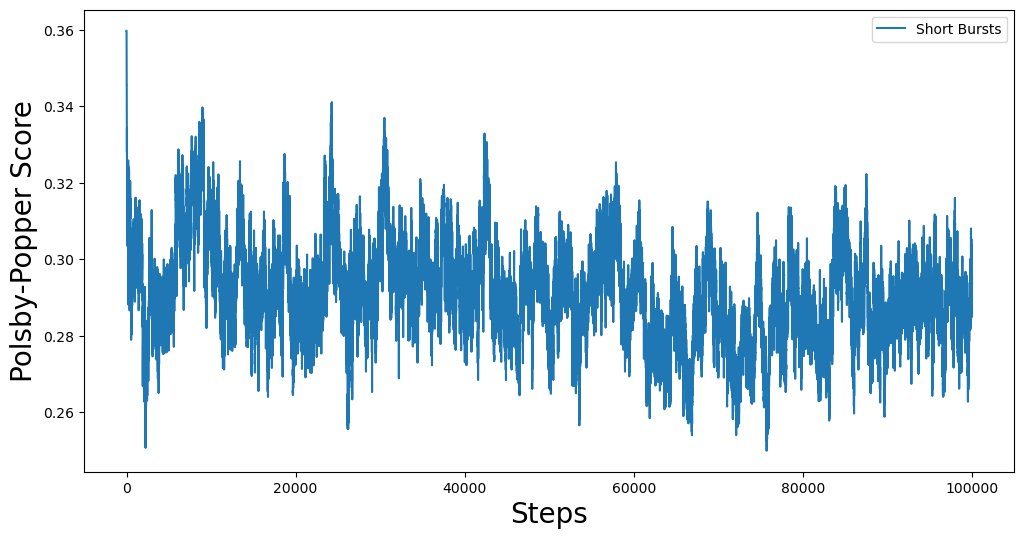

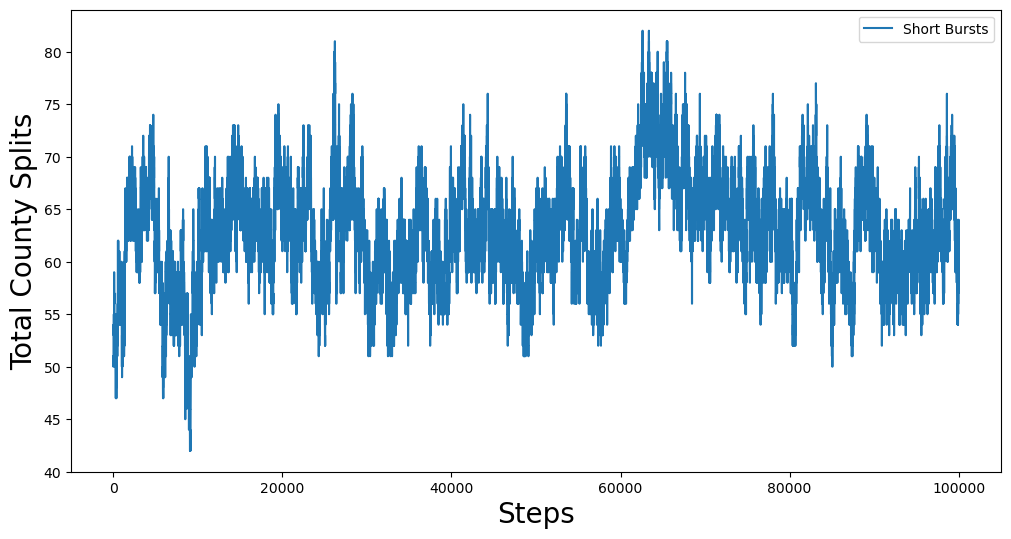


*****************************************
Generating seed plan for MS SH blockgroup
*****************************************

number of nodes, edges: 2445 6740
Effectively using k, L, U = 122 23060 25486
Using one split county, attempting to bipartition cluster into sizes: 61 61
Using one split county, attempting to bipartition cluster into sizes: 30 31
Using one split county, attempting to bipartition cluster into sizes: 15 16
Using one split county, attempting to bipartition cluster into sizes: 8 8
Using one split county, attempting to bipartition cluster into sizes: 4 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartitio

 27%|████████████████████▍                                                      | 27331/100000 [06:31<15:31, 78.03it/s]C:\Users\buchanan\AppData\Local\anaconda3\Lib\site-packages\gerrychain\tree.py:704: BipartitionWarning: 
Failed to find a balanced cut after 1000 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts for recombination.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [24:31<00:00, 67.97it/s]


i gingles pp s1 s2
0 27.499 0.3685 51 116
1000 37.4556 0.2765 66 185
2000 39.4903 0.2692 71 198
3000 40.4974 0.2649 73 196
4000 41.4965 0.2671 76 200
5000 42.4965 0.2656 75 201
6000 42.4965 0.26 73 192
7000 43.4965 0.2584 74 194
8000 44.4987 0.2609 77 202
9000 44.4987 0.2669 75 201
10000 45.4794 0.2646 76 206
11000 45.4843 0.2508 77 216
12000 45.4843 0.2582 79 216
13000 46.4267 0.2638 78 212
14000 46.4622 0.2679 81 211
15000 46.4672 0.2613 77 212
16000 46.47 0.2631 77 209
17000 46.4707 0.2618 80 213
18000 46.4707 0.2595 76 215
19000 46.4707 0.2727 78 206
20000 46.4707 0.2628 78 208
21000 46.4707 0.2637 75 202
22000 46.4707 0.2772 75 193
23000 46.4739 0.2686 75 199
24000 47.4739 0.2711 75 199
25000 47.4739 0.2594 77 208
26000 47.4739 0.2685 73 208
27000 47.4739 0.2628 74 215
28000 48.4926 0.2639 75 219
29000 49.4745 0.2642 78 210
30000 49.4745 0.2667 79 223
31000 49.4745 0.266 75 214
32000 49.4745 0.2623 77 217
33000 49.4745 0.2504 77 210
34000 49.4745 0.2515 75 215
35000 49.4745 0.2475

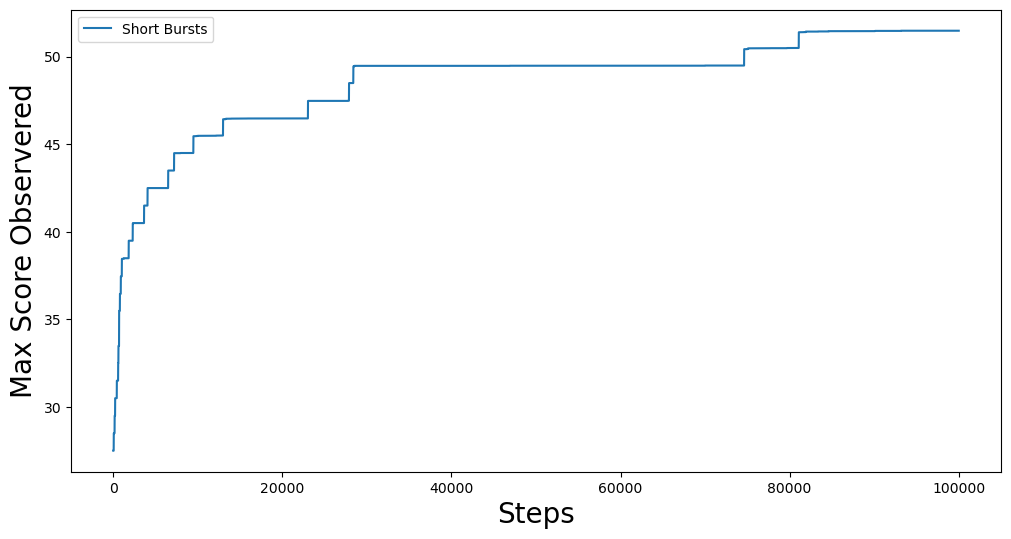

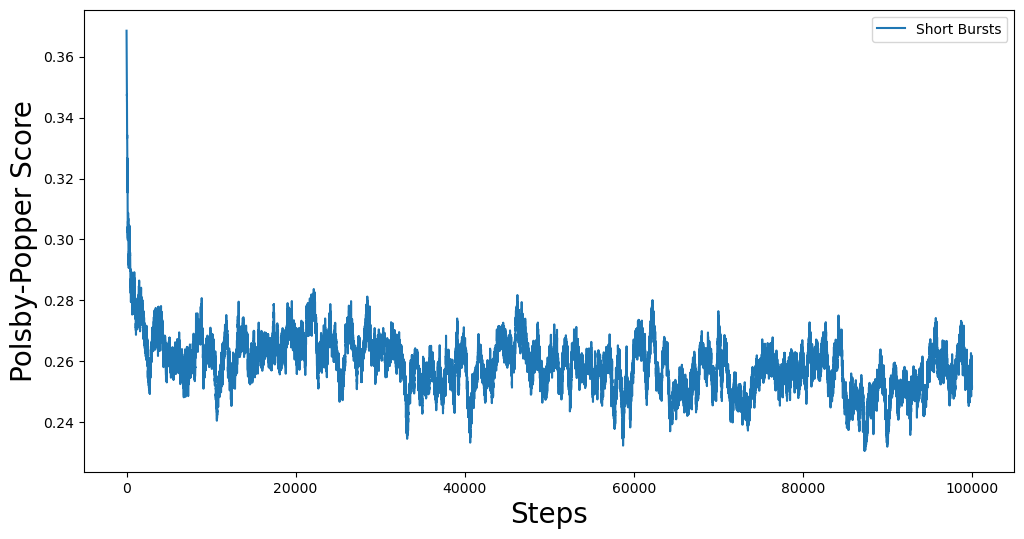

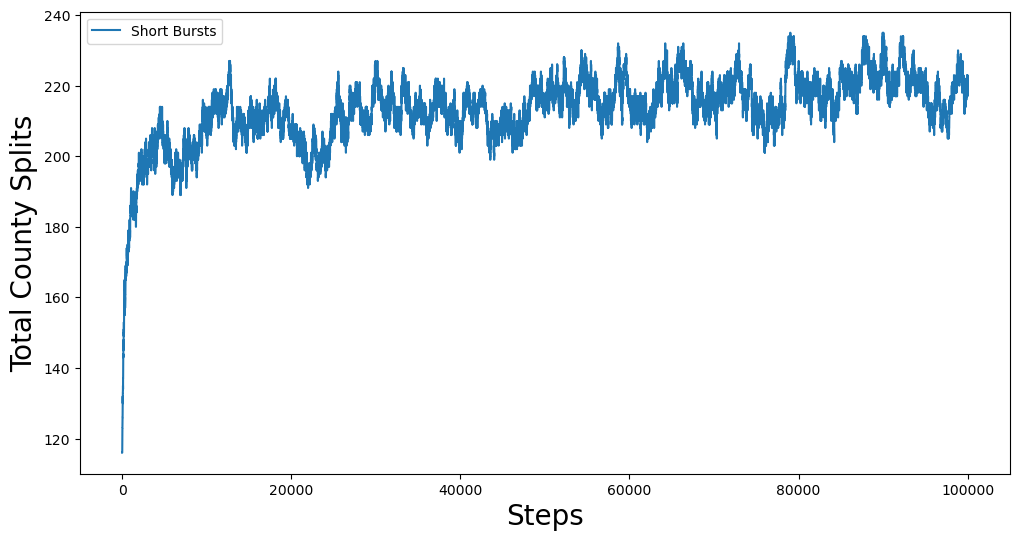


*****************************************
Starting short bursts for MS SH blockgroup
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [23:02<00:00, 72.32it/s]


i gingles pp s1 s2
0 27.499 0.3685 51 116
1000 36.4942 0.3157 54 126
2000 38.4943 0.3092 54 126
3000 38.4946 0.3241 57 133
4000 41.4596 0.3089 60 132
5000 41.4596 0.318 58 137
6000 41.4598 0.3231 58 135
7000 41.4984 0.3185 58 135
8000 44.4719 0.322 61 133
9000 44.4719 0.3137 62 143
10000 44.4846 0.3094 62 141
11000 44.4846 0.2999 62 139
12000 45.4673 0.3144 61 137
13000 45.4799 0.3096 58 134
14000 45.4799 0.3165 58 132
15000 45.4852 0.301 57 131
16000 45.4852 0.3078 59 132
17000 45.4852 0.3001 58 129
18000 45.4968 0.3199 55 132
19000 45.4968 0.3149 57 135
20000 45.4968 0.3235 59 141
21000 46.4968 0.3171 58 130
22000 46.4968 0.3137 58 129
23000 46.4968 0.3129 59 135
24000 46.4968 0.3163 59 138
25000 46.4968 0.3012 62 135
26000 46.4968 0.3044 60 133
27000 46.4968 0.2997 63 134
28000 47.4968 0.3095 61 137
29000 47.4968 0.2976 63 140
30000 47.4968 0.309 58 130
31000 48.4968 0.3026 64 139
32000 48.4968 0.316 60 137
33000 48.4968 0.2989 63 140
34000 48.4968 0.3111 61 133
35000 48.4968 0.3124

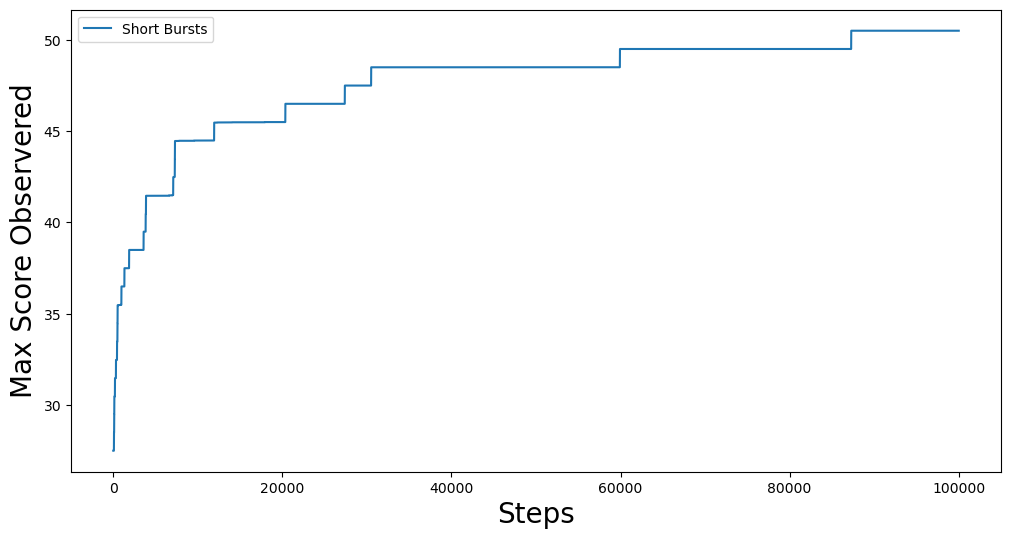

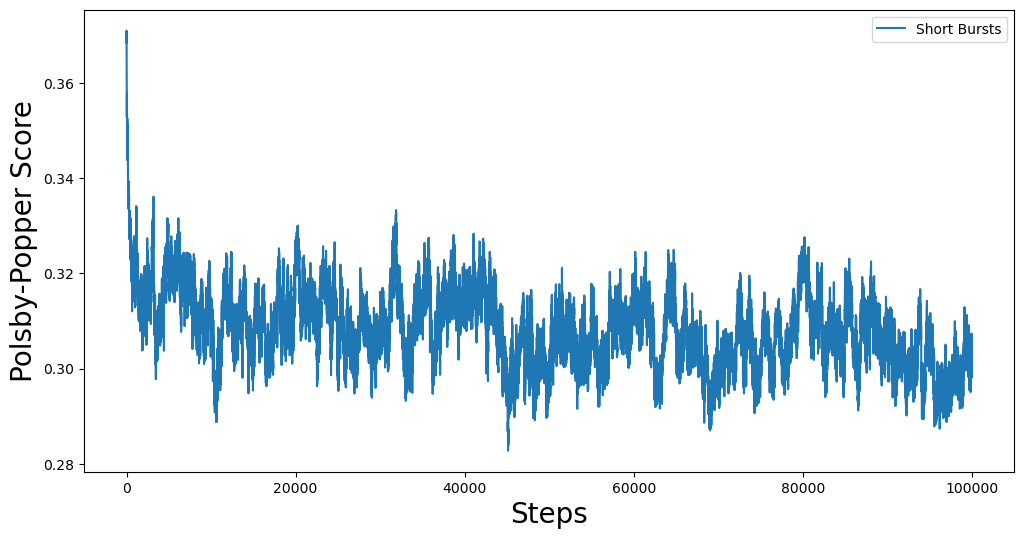

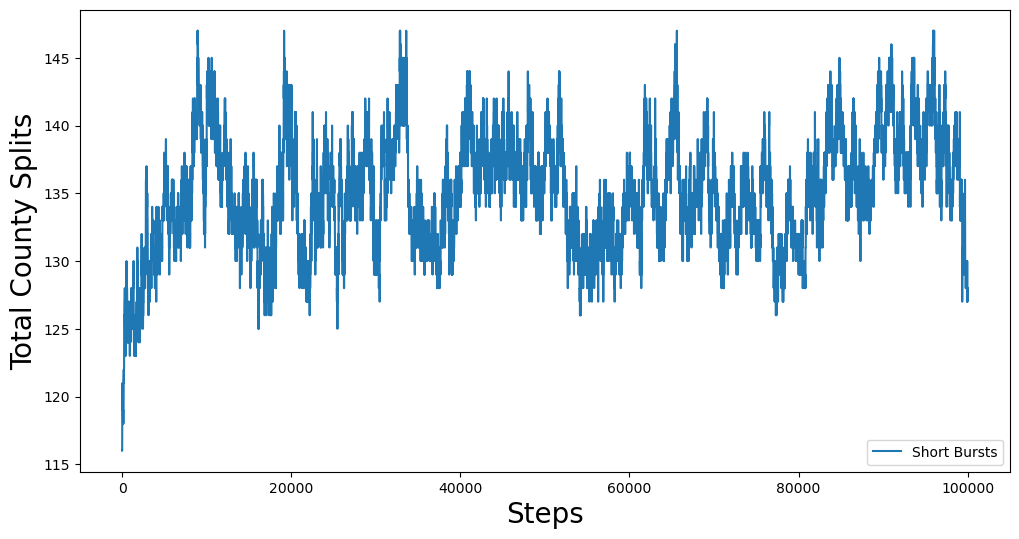


*****************************************
Generating seed plan for AL SS vtd
*****************************************

number of nodes, edges: 1837 5221
Effectively using k, L, U = 35 136374 150728
Using one split county, attempting to bipartition cluster into sizes: 17 18
Using one split county, attempting to bipartition cluster into sizes: 9 9
Using one split county, attempting to bipartition cluster into sizes: 4 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster 

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [36:07<00:00, 46.13it/s]


i gingles pp s1 s2
0 4.4279 0.3005 24 34
1000 7.4531 0.174 54 95
2000 8.4211 0.1781 52 92
3000 8.45 0.1749 59 102
4000 8.45 0.187 55 100
5000 8.45 0.1963 55 98
6000 8.45 0.1777 57 100
7000 8.45 0.1883 56 94
8000 8.45 0.1902 53 98
9000 8.45 0.1712 55 97
10000 8.4516 0.1742 54 96
11000 8.4516 0.1864 52 92
12000 8.4516 0.1746 55 96
13000 8.4559 0.1727 55 100
14000 8.4559 0.1567 56 98
15000 8.4559 0.1782 57 98
16000 8.4559 0.2017 53 94
17000 8.4559 0.1738 52 100
18000 8.4559 0.1663 61 105
19000 8.4559 0.1649 58 105
20000 8.4559 0.1766 58 105
21000 8.4559 0.1759 57 93
22000 8.4559 0.1809 54 96
23000 8.4563 0.1787 57 100
24000 8.4563 0.1674 57 97
25000 8.4563 0.1923 53 98
26000 8.4563 0.1797 59 105
27000 8.4563 0.1887 54 100
28000 8.4563 0.1873 55 97
29000 8.4563 0.1756 59 95
30000 8.4563 0.1849 53 96
31000 8.4563 0.1724 55 103
32000 8.4563 0.1671 57 105
33000 8.4563 0.1789 58 106
34000 8.4563 0.1685 58 99
35000 8.4563 0.1952 52 97
36000 8.4563 0.1907 52 102
37000 8.4563 0.1866 56 102
38000 

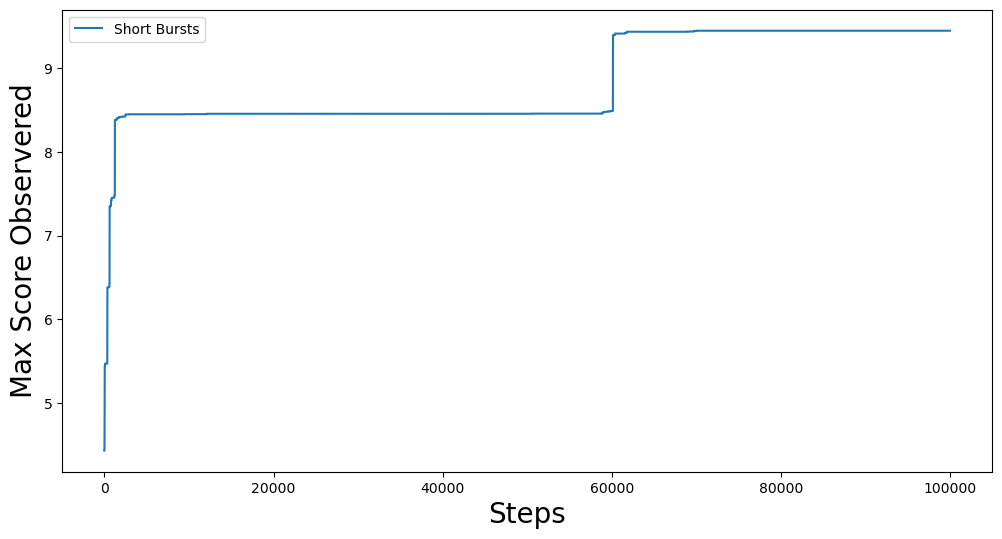

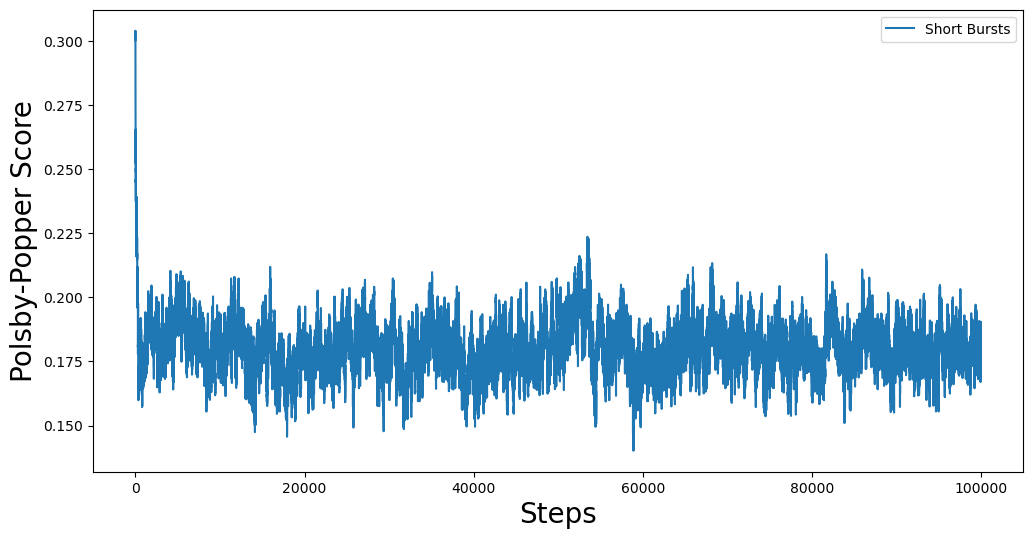

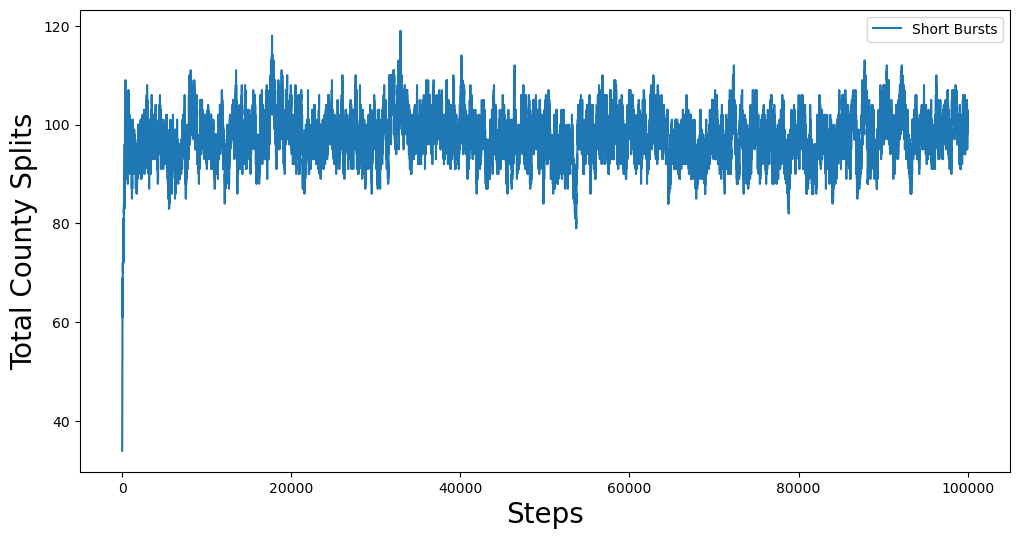


*****************************************
Starting short bursts for AL SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [31:53<00:00, 52.26it/s]


i gingles pp s1 s2
0 4.4279 0.3005 24 34
1000 7.4469 0.2675 28 41
2000 7.4645 0.2485 28 45
3000 7.4901 0.2557 33 52
4000 8.4801 0.2681 26 45
5000 9.3959 0.2752 31 45
6000 9.4488 0.2641 28 40
7000 9.453 0.2589 28 46
8000 9.453 0.2385 31 47
9000 9.453 0.2396 32 50
10000 9.453 0.2511 29 42
11000 9.453 0.2681 30 44
12000 9.453 0.2642 25 37
13000 9.4548 0.2756 29 45
14000 9.4548 0.2803 30 45
15000 9.4548 0.2696 27 41
16000 9.458 0.2484 28 43
17000 9.458 0.2517 28 42
18000 9.458 0.2679 29 47
19000 9.458 0.2576 28 44
20000 9.458 0.2629 31 47
21000 9.458 0.2486 34 50
22000 9.458 0.2501 30 40
23000 9.458 0.2574 32 47
24000 9.458 0.2509 27 43
25000 9.458 0.2556 26 38
26000 9.458 0.254 32 48
27000 9.458 0.2608 28 45
28000 9.458 0.255 30 41
29000 9.458 0.2603 32 41
30000 9.458 0.2537 31 45
31000 9.458 0.2511 34 49
32000 9.458 0.2503 31 41
33000 9.458 0.2541 29 43
34000 9.458 0.2419 36 53
35000 9.458 0.2564 34 46
36000 9.458 0.2896 27 40
37000 9.458 0.2861 26 41
38000 9.458 0.2526 35 53
39000 9.458

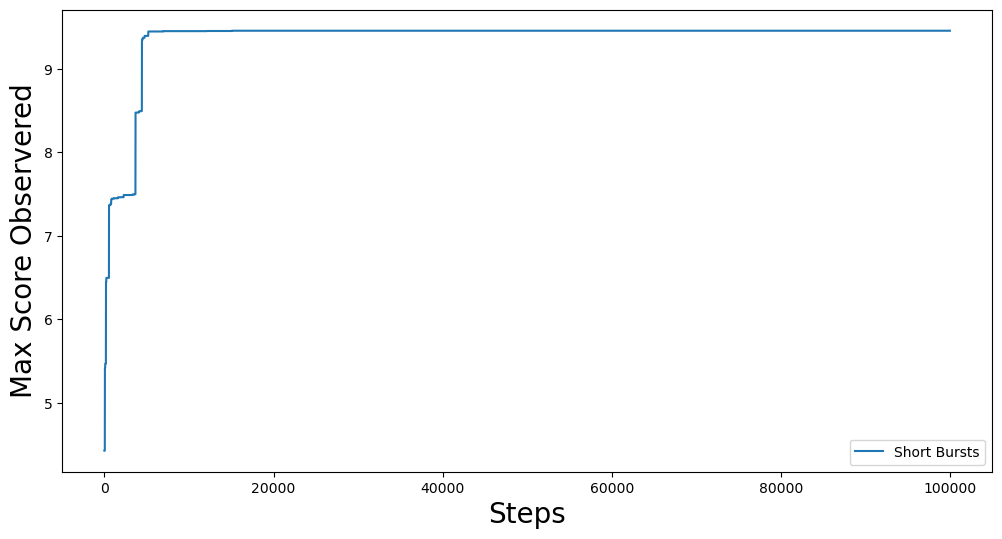

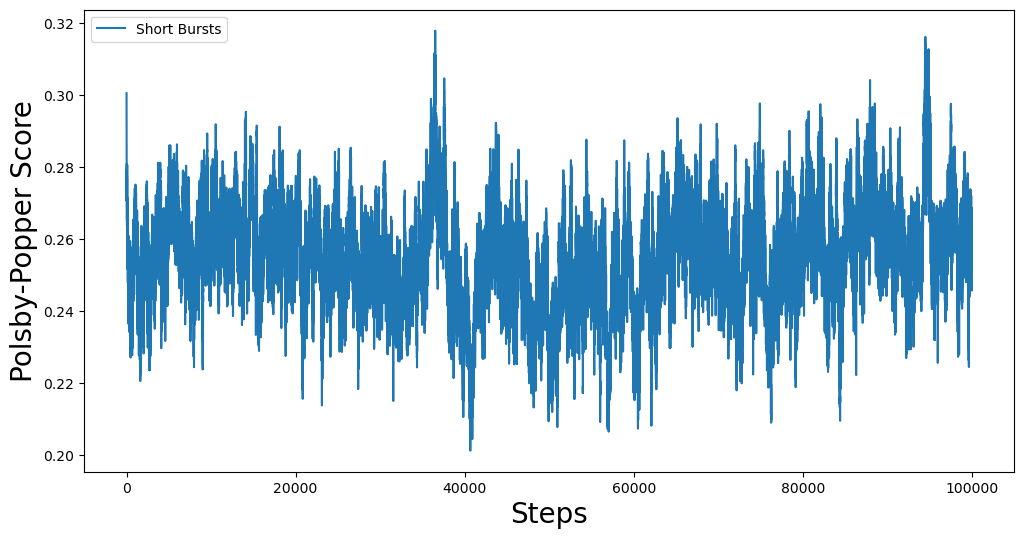

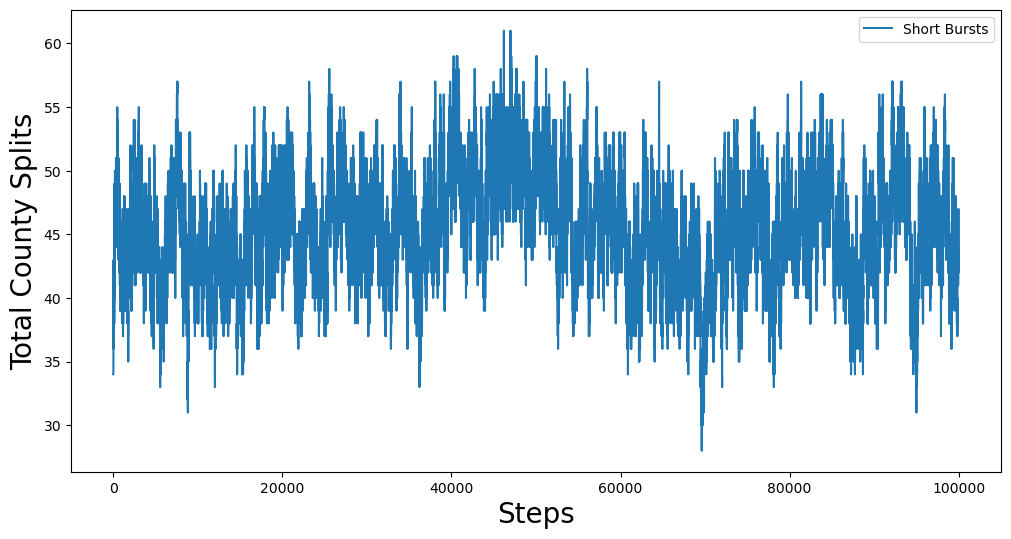


*****************************************
Generating seed plan for AL SH blockgroup
*****************************************

number of nodes, edges: 3925 10903
Effectively using k, L, U = 105 45458 50242
Using one split county, attempting to bipartition cluster into sizes: 52 53
Using one split county, attempting to bipartition cluster into sizes: 26 27
Using one split county, attempting to bipartition cluster into sizes: 13 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartiti

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [39:27<00:00, 42.23it/s]


i gingles pp s1 s2
0 13.4931 0.3463 40 102
1000 23.4642 0.26 60 178
2000 25.4899 0.2329 59 177
3000 25.4899 0.2206 64 189
4000 25.4989 0.2231 63 194
5000 26.4133 0.2118 64 199
6000 26.4272 0.2183 65 196
7000 27.4326 0.2219 63 204
8000 27.4348 0.2353 61 193
9000 27.4459 0.2265 60 192
10000 27.4531 0.233 63 191
11000 27.4531 0.2325 63 193
12000 27.458 0.2317 61 194
13000 28.3951 0.2255 60 202
14000 28.4152 0.2278 60 197
15000 28.45 0.222 61 199
16000 28.4579 0.2175 65 200
17000 28.4589 0.2249 62 198
18000 28.4589 0.2216 64 196
19000 29.3941 0.2241 63 194
20000 29.4457 0.232 64 201
21000 29.4543 0.2154 65 196
22000 29.4581 0.2372 61 190
23000 29.4609 0.2293 65 200
24000 29.4947 0.2196 66 208
25000 30.3811 0.2231 64 208
26000 30.4201 0.2255 64 202
27000 30.422 0.2216 63 198
28000 30.422 0.2171 63 197
29000 30.422 0.2236 64 208
30000 30.422 0.2225 65 203
31000 30.422 0.2179 65 203
32000 30.422 0.2396 63 196
33000 30.422 0.2229 61 196
34000 30.422 0.2214 66 202
35000 30.422 0.2152 63 203
360

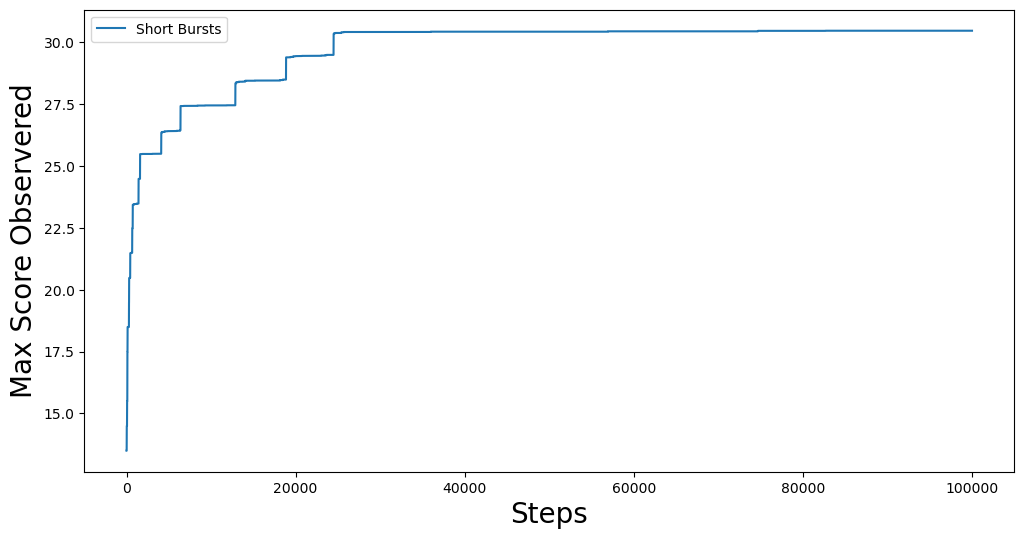

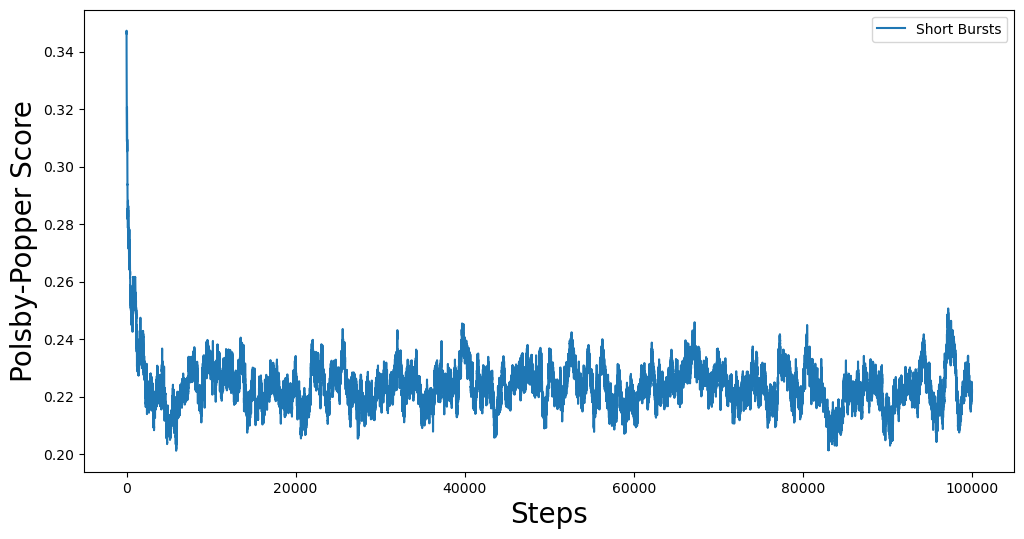

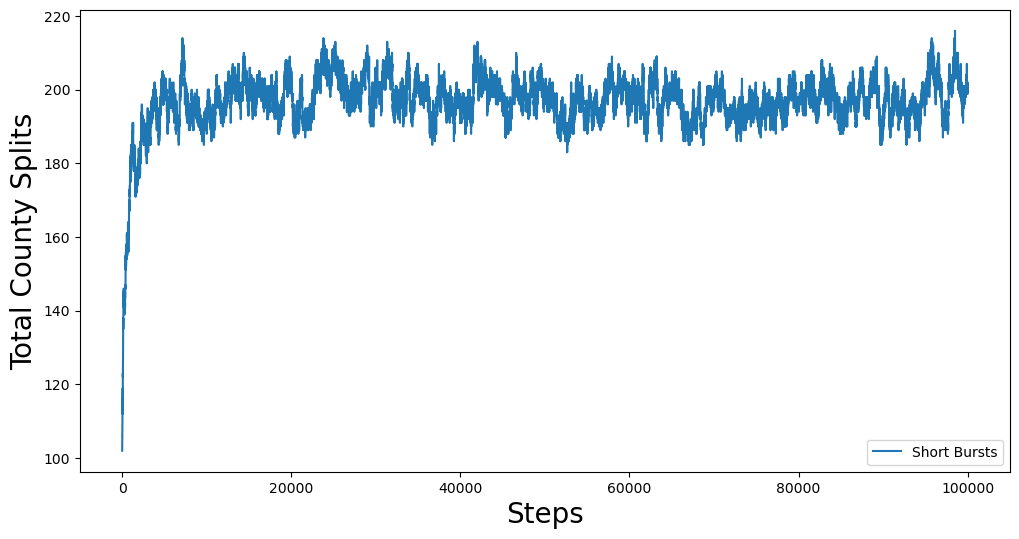


*****************************************
Starting short bursts for AL SH blockgroup
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [37:26<00:00, 44.52it/s]


i gingles pp s1 s2
0 13.4931 0.3463 40 102
1000 20.4925 0.275 45 116
2000 22.4862 0.2662 46 117
3000 23.4722 0.2749 46 121
4000 24.4927 0.2763 44 118
5000 24.4927 0.2714 41 119
6000 24.4927 0.2764 44 119
7000 24.4935 0.267 45 125
8000 26.4174 0.2618 46 126
9000 26.4219 0.2717 46 120
10000 26.4424 0.263 48 117
11000 26.493 0.2592 48 124
12000 27.3811 0.2556 48 122
13000 27.426 0.2468 48 125
14000 27.4903 0.2566 45 121
15000 28.4304 0.2696 40 111
16000 28.4377 0.2717 44 119
17000 28.4377 0.2664 44 116
18000 28.4747 0.2762 44 119
19000 28.4747 0.272 42 114
20000 28.4751 0.2711 44 120
21000 28.4815 0.2638 44 123
22000 29.3705 0.2627 50 121
23000 29.3705 0.253 47 117
24000 29.4095 0.2748 43 111
25000 29.4211 0.2643 44 116
26000 29.4427 0.2705 47 121
27000 29.4464 0.2691 44 117
28000 29.4464 0.2793 42 110
29000 29.4464 0.2667 44 113
30000 29.4464 0.2723 44 116
31000 29.4464 0.2438 46 116
32000 29.4464 0.2596 46 119
33000 29.4464 0.2594 46 123
34000 29.4464 0.2678 47 128
35000 29.4464 0.2691 

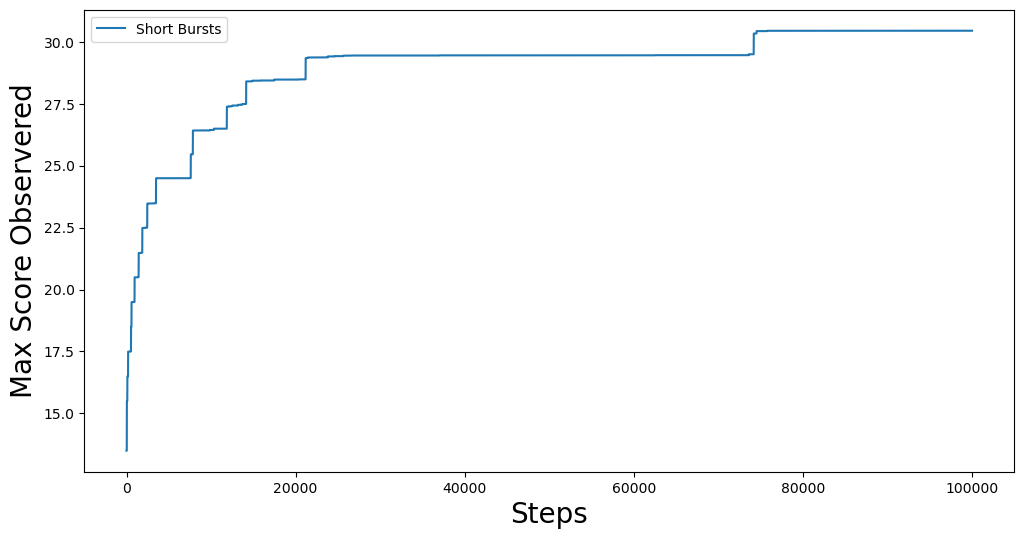

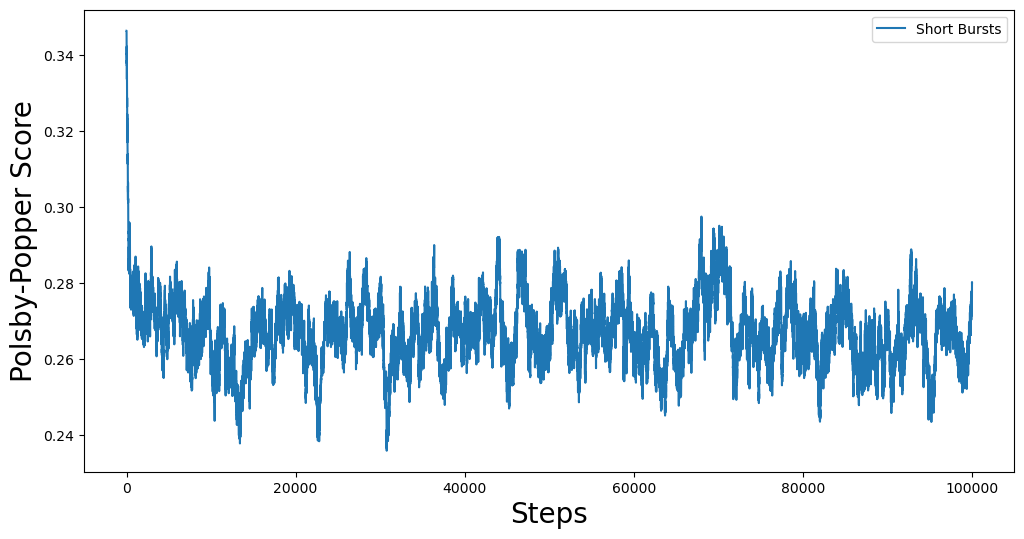

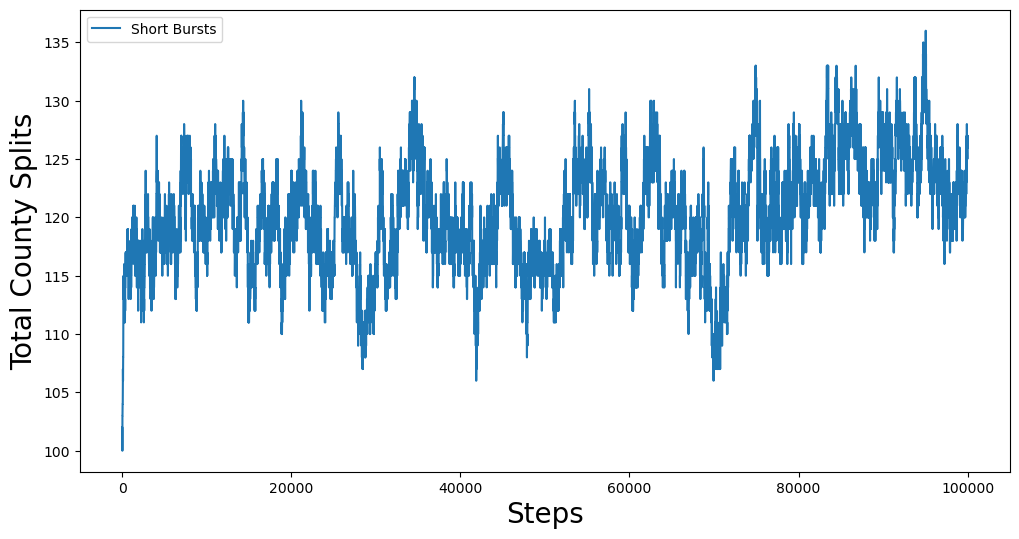


*****************************************
Generating seed plan for GA SS vtd
*****************************************

number of nodes, edges: 2698 7705
Effectively using k, L, U = 56 181720 200848
Using one split county, attempting to bipartition cluster into sizes: 28 28
Using one split county, attempting to bipartition cluster into sizes: 14 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Without limiting splits, attempting to bipartition cluster
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [38:04<00:00, 43.77it/s]


i gingles pp s1 s2
0 10.4953 0.3154 31 53
1000 14.4628 0.1839 91 158
2000 15.4168 0.1821 89 151
3000 15.4299 0.1777 92 165
4000 15.4482 0.1792 92 160
5000 15.4482 0.1843 95 168
6000 15.4514 0.1695 88 159
7000 15.4821 0.1992 85 161
8000 16.4386 0.1841 91 166
9000 16.4472 0.1761 101 170
10000 16.4517 0.1931 85 158
11000 16.4517 0.1811 92 162
12000 16.4614 0.1698 94 169
13000 16.4614 0.1747 90 171
14000 16.4703 0.1827 93 166
15000 16.475 0.1887 96 158
16000 16.4764 0.1813 89 159
17000 16.4794 0.1742 92 172
18000 17.4815 0.1803 83 159
19000 17.4815 0.1729 95 170
20000 17.4843 0.1652 91 159
21000 17.4877 0.1692 91 169
22000 17.4889 0.1723 92 164
23000 17.4911 0.1812 82 165
24000 17.4911 0.1758 93 164
25000 17.4911 0.1666 94 163
26000 17.4911 0.1795 90 155
27000 17.4911 0.1839 91 156
28000 17.4923 0.1917 95 159
29000 17.494 0.1757 95 157
30000 17.494 0.1763 92 163
31000 17.494 0.181 92 164
32000 17.494 0.1908 82 156
33000 17.494 0.1921 85 154
34000 17.494 0.1795 85 158
35000 18.4739 0.1864 8

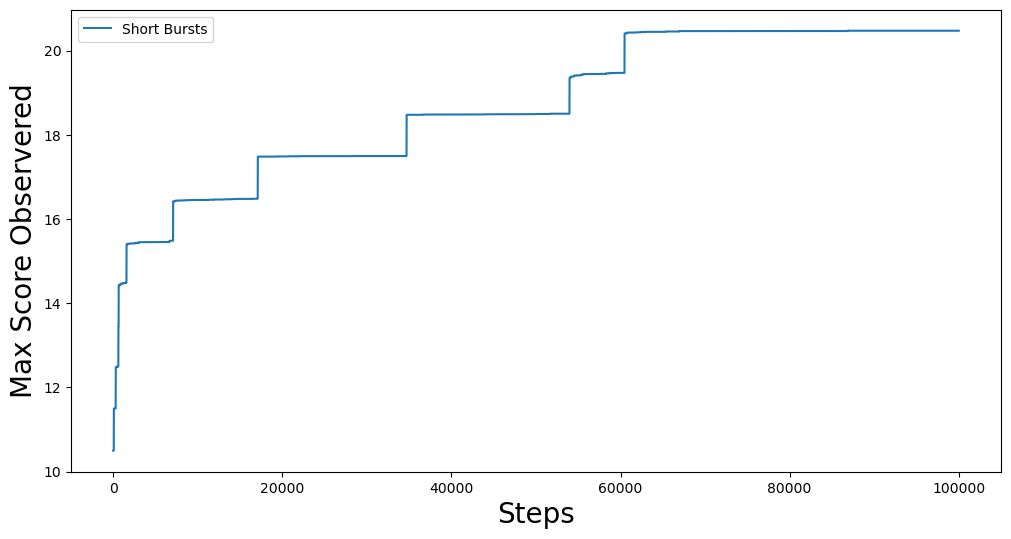

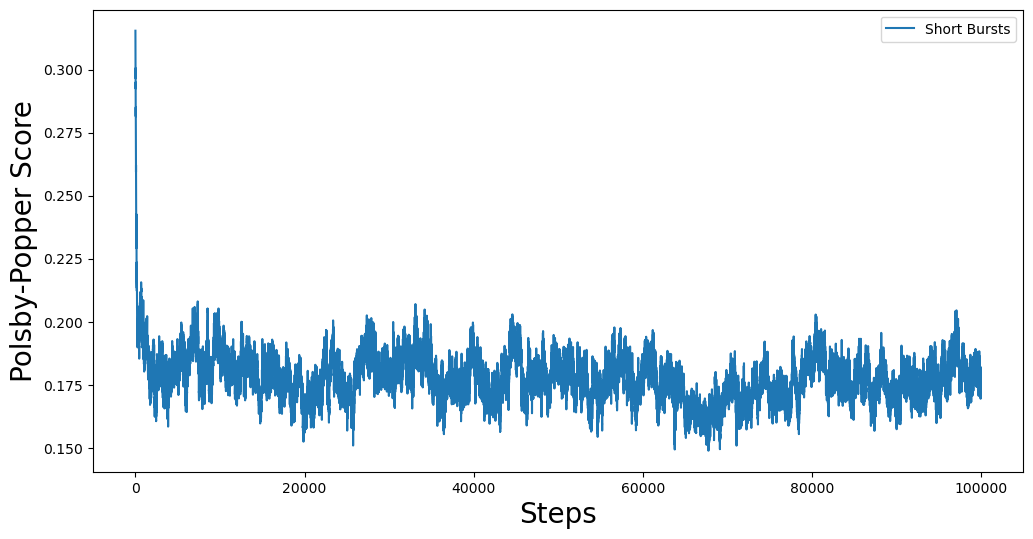

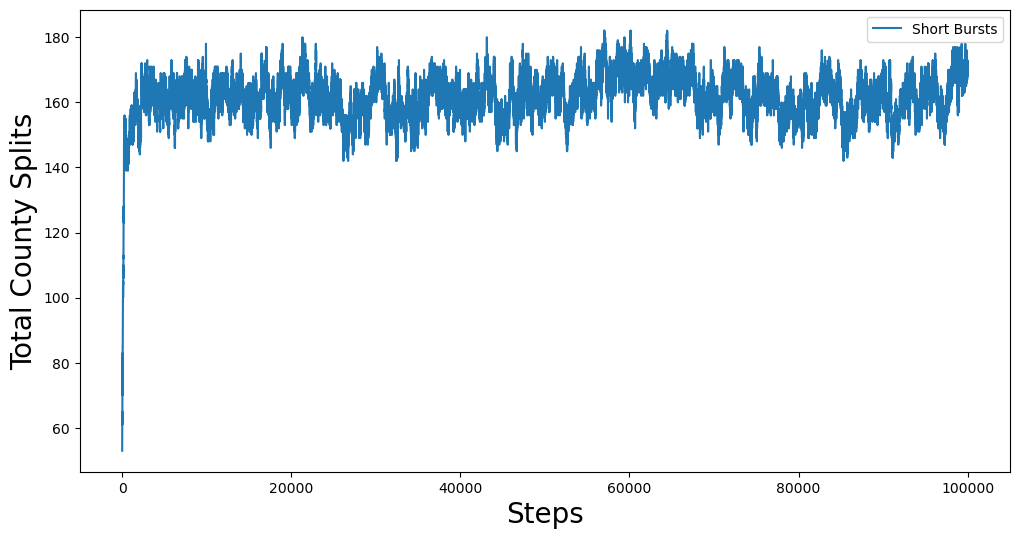


*****************************************
Starting short bursts for GA SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [35:01<00:00, 47.58it/s]

i gingles pp s1 s2
0 10.4953 0.3154 31 53
1000 14.4471 0.2567 37 64
2000 14.4853 0.2587 35 64
3000 15.4457 0.2764 36 66
4000 15.4654 0.2603 37 61
5000 15.4835 0.2628 42 70
6000 15.4921 0.2667 44 74
7000 16.4992 0.2643 41 72
8000 17.3569 0.2553 44 75
9000 17.4082 0.2608 39 71
10000 17.4397 0.2453 42 71
11000 17.4506 0.2485 42 70
12000 17.451 0.2414 36 69
13000 17.4979 0.2506 41 76
14000 17.4979 0.2214 53 90
15000 17.4979 0.2523 50 78
16000 17.4979 0.2608 41 69
17000 17.4979 0.2561 41 71
18000 17.4986 0.2452 47 76
19000 17.4986 0.2561 40 68
20000 18.3816 0.264 46 69
21000 18.398 0.2406 46 73
22000 18.4052 0.2392 50 80
23000 18.4052 0.2376 42 69
24000 18.4052 0.2306 47 81
25000 18.4297 0.2518 47 80
26000 18.4986 0.2368 43 73
27000 19.44 0.2382 45 76
28000 19.44 0.233 50 84
29000 19.4467 0.24 46 79
30000 19.4467 0.2472 45 76
31000 19.4467 0.2391 48 83
32000 19.4555 0.2305 50 85
33000 19.4555 0.2394 48 79
34000 19.4555 0.2349 52 86
35000 19.4591 0.2386 43 74
36000 19.4591 0.2349 48 83
37000

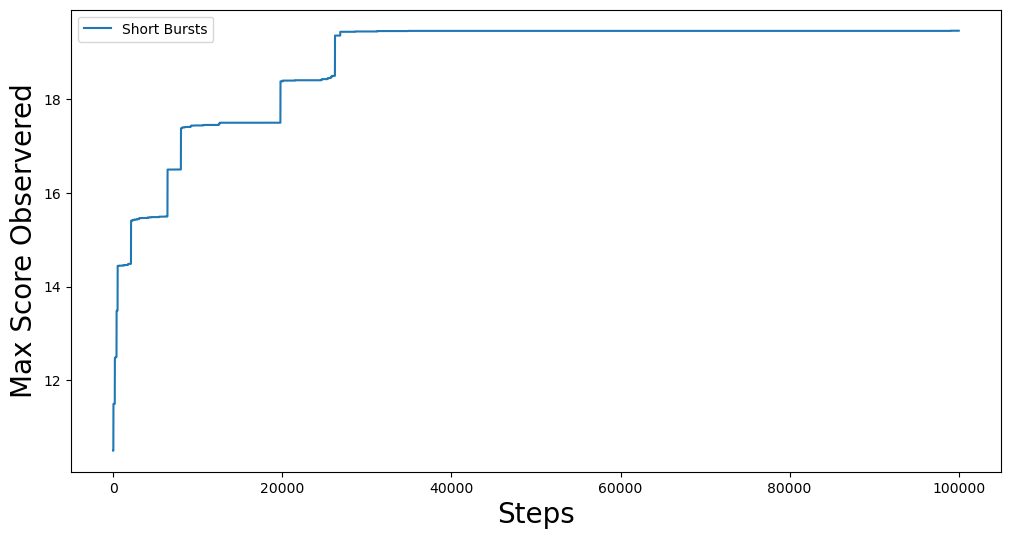

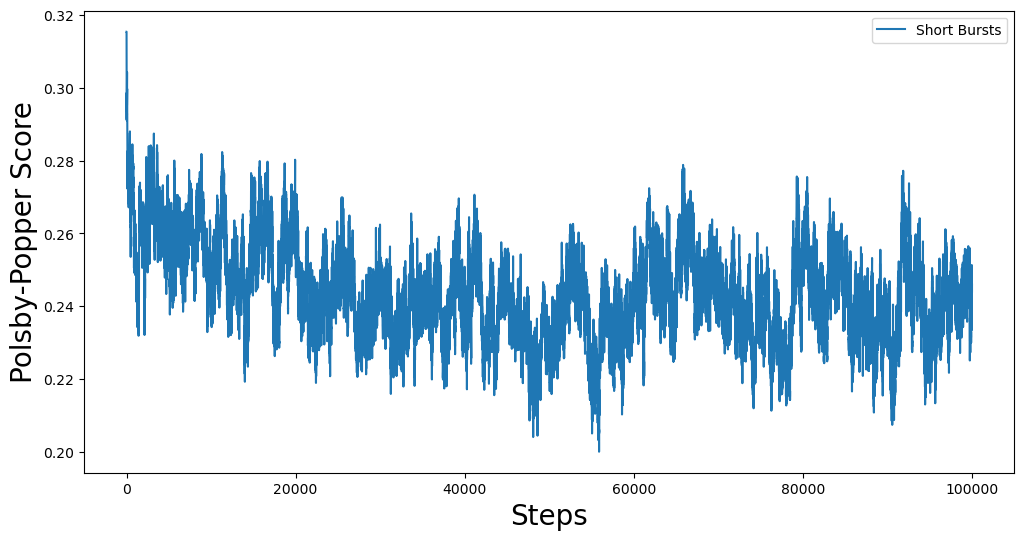

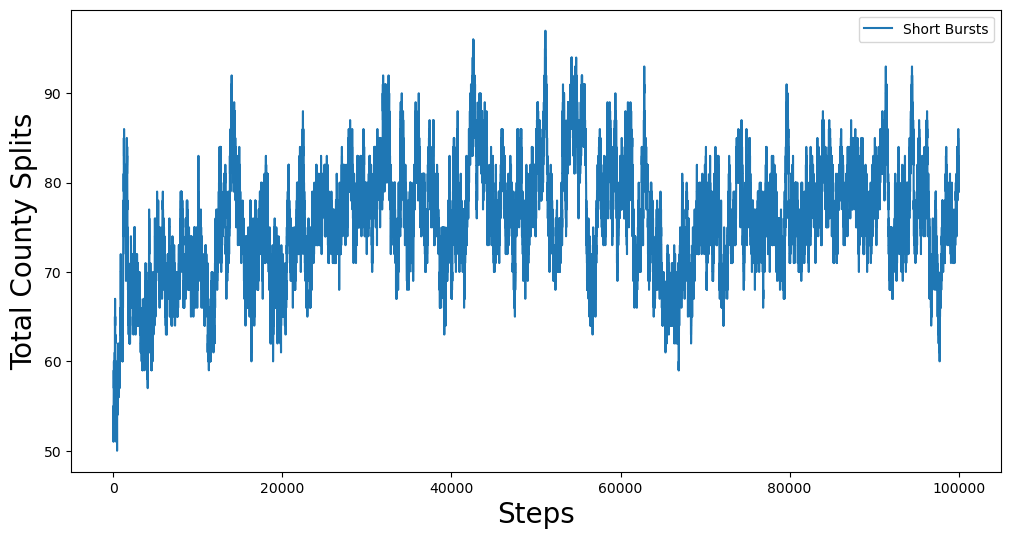


*****************************************
Generating seed plan for GA SH blockgroup
*****************************************

number of nodes, edges: 7446 20537
Effectively using k, L, U = 180 56536 62486
Using one split county, attempting to bipartition cluster into sizes: 90 90
Using one split county, attempting to bipartition cluster into sizes: 45 45
Using one split county, attempting to bipartition cluster into sizes: 22 23
Using one split county, attempting to bipartition cluster into sizes: 11 12
Using one split county, attempting to bipartition cluster into sizes: 6 6
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to biparti

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:06:53<00:00, 24.92it/s]


i gingles pp s1 s2
0 35.4901 0.3669 69 174
1000 40.4781 0.2528 115 322
2000 43.4891 0.2493 123 348
3000 43.4891 0.2467 120 363
4000 44.4891 0.2332 116 366
5000 44.497 0.2329 117 365
6000 44.4971 0.2386 123 366
7000 44.4972 0.2252 131 385
8000 45.4983 0.2296 130 361
9000 46.4911 0.2329 133 368
10000 47.4779 0.2389 121 364
11000 47.4862 0.2263 132 378
12000 48.4862 0.2255 131 383
13000 48.4862 0.2316 134 390
14000 49.4606 0.2301 132 373
15000 49.463 0.2385 129 388
16000 49.4641 0.2364 128 380
17000 49.4888 0.2402 125 371
18000 49.4888 0.2241 125 379
19000 49.4962 0.2268 124 374
20000 49.4962 0.2222 125 368
21000 49.4962 0.2384 123 365
22000 49.4962 0.2339 124 366
23000 49.4962 0.2282 130 382
24000 49.4981 0.2224 131 375
25000 49.4981 0.2295 125 366
26000 50.4872 0.2218 132 377
27000 50.4872 0.222 128 368
28000 50.4872 0.2182 128 388
29000 50.4872 0.2253 130 378
30000 50.4872 0.2279 127 372
31000 50.4872 0.2298 122 366
32000 51.4872 0.2313 128 372
33000 51.4872 0.2303 130 370
34000 51.488

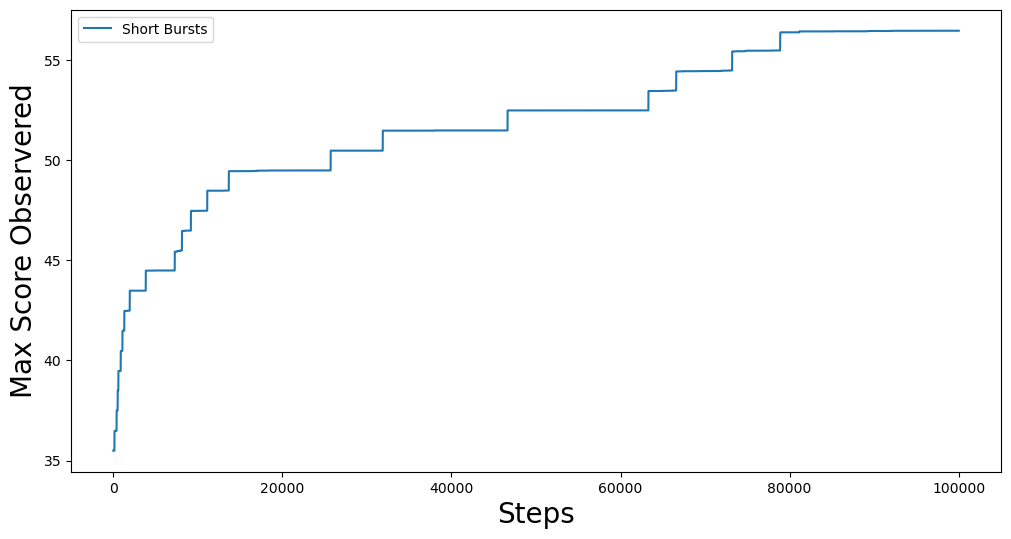

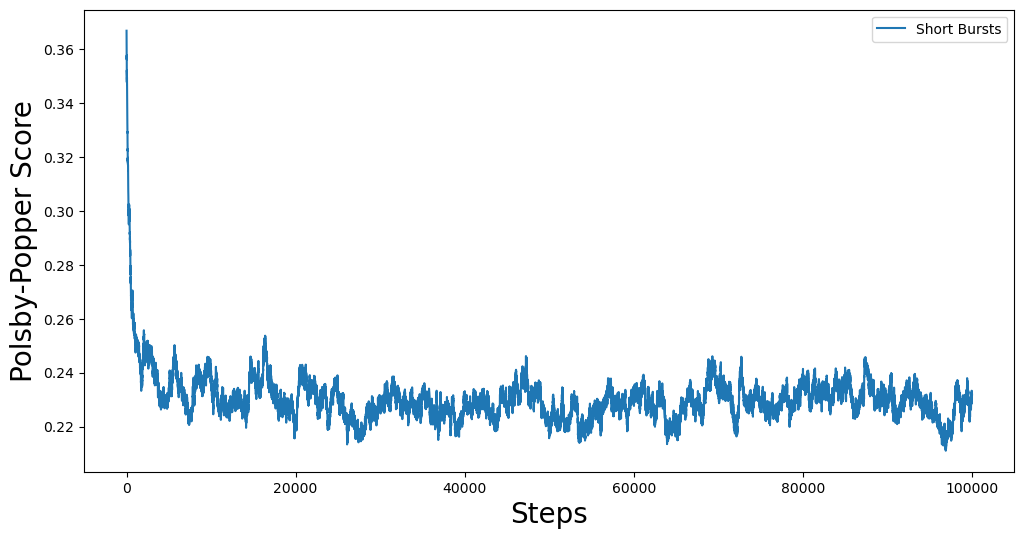

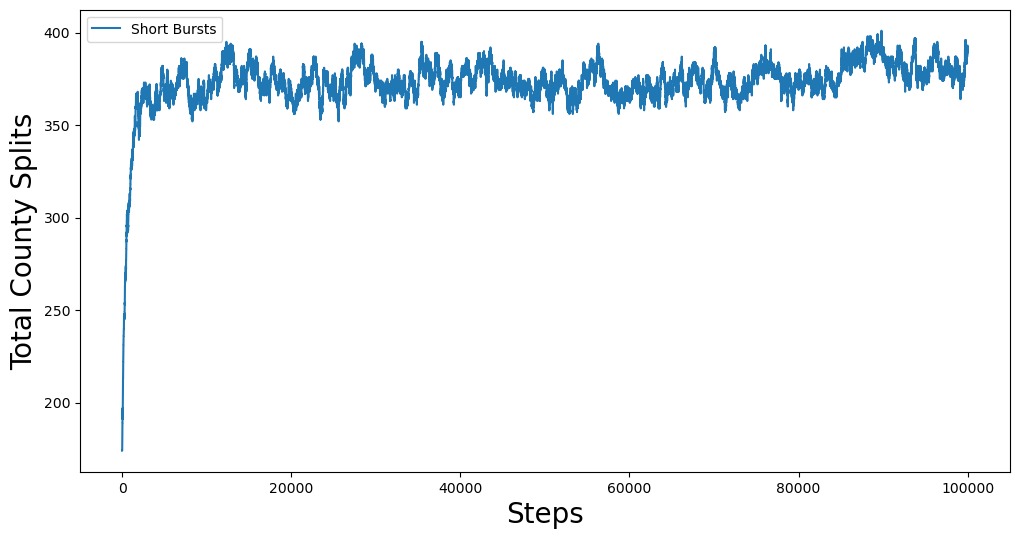


*****************************************
Starting short bursts for GA SH blockgroup
Region-aware: True
*****************************************



100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:04:44<00:00, 25.75it/s]


i gingles pp s1 s2
0 35.4901 0.3669 69 174
1000 38.4859 0.2901 82 207
2000 40.4859 0.2878 80 205
3000 40.4885 0.283 81 212
4000 41.495 0.2837 72 203
5000 43.4828 0.2755 79 208
6000 43.4862 0.287 77 202
7000 44.4818 0.2906 87 212
8000 44.4818 0.2785 83 210
9000 44.4928 0.2907 85 210
10000 45.4818 0.2888 74 206
11000 45.4921 0.2765 81 210
12000 46.4818 0.2742 77 206
13000 47.4818 0.2723 82 223
14000 47.4818 0.2615 84 222
15000 47.4818 0.2714 83 217
16000 47.4818 0.2829 74 209
17000 47.4818 0.2749 78 212
18000 47.4818 0.2795 75 214
19000 47.4818 0.2722 83 226
20000 47.4818 0.2748 80 215
21000 48.4818 0.2588 83 229
22000 48.4818 0.2613 80 229
23000 48.4903 0.2605 82 229
24000 48.4903 0.268 82 217
25000 50.4744 0.2676 74 205
26000 50.4744 0.2647 79 212
27000 51.4744 0.2685 82 212
28000 51.4744 0.2677 87 210
29000 51.4818 0.2759 87 217
30000 51.4818 0.2732 85 218
31000 51.4818 0.2698 88 225
32000 51.4818 0.2759 82 221
33000 51.4835 0.2751 82 216
34000 51.4835 0.2695 84 219
35000 52.4835 0.26

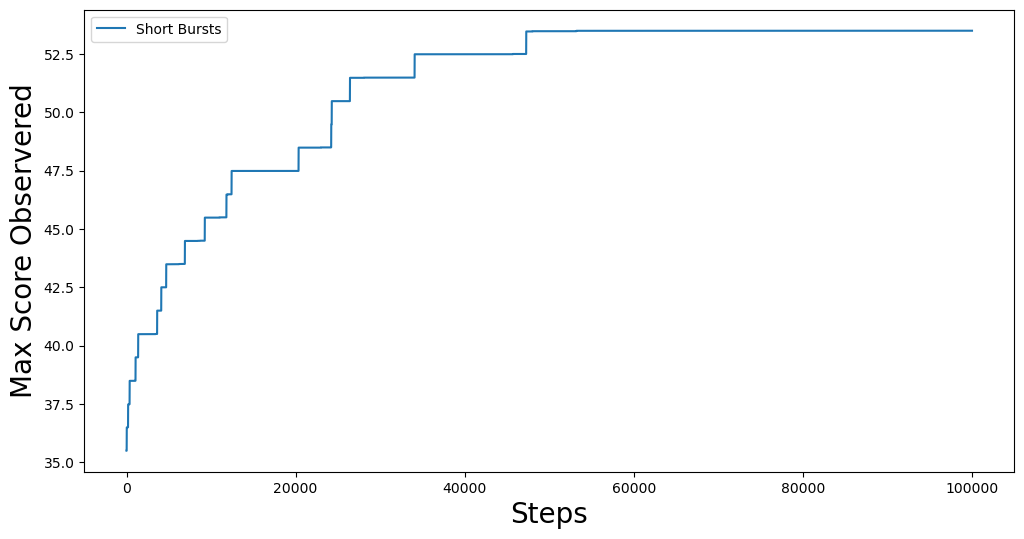

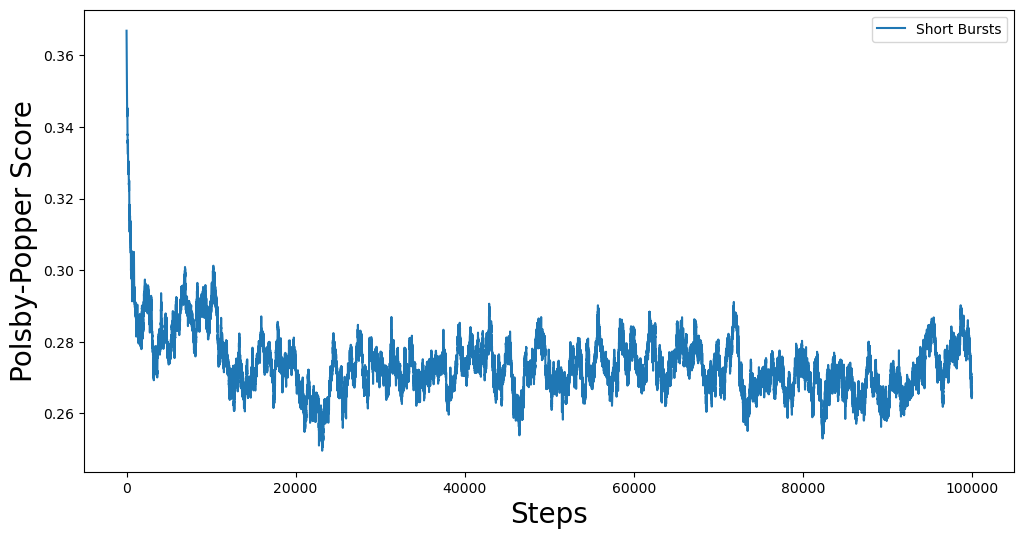

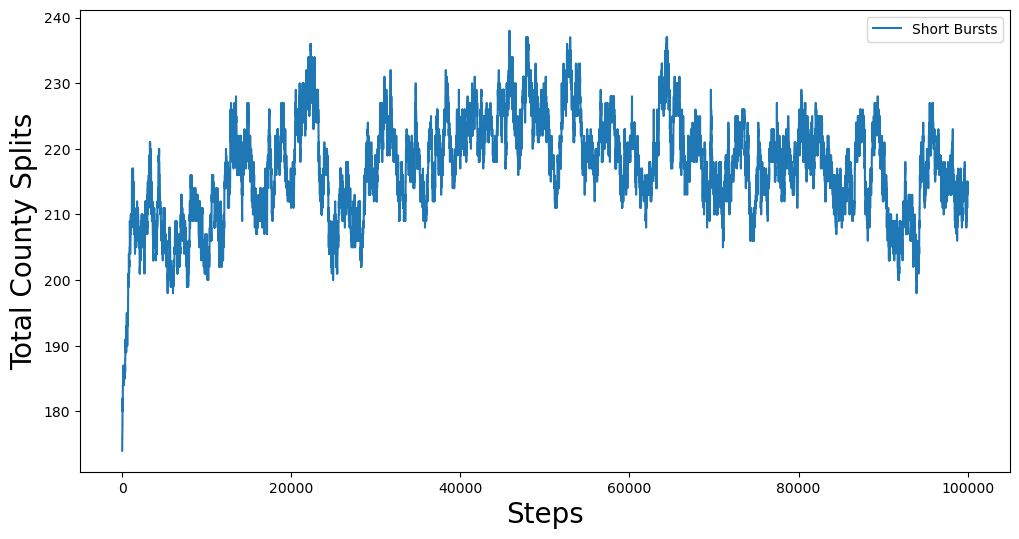

In [4]:
for state in states:

    for district_type in district_types:

        level = 'vtd' if district_type == 'SS' else 'blockgroup'

        print("\n*****************************************")
        print("Generating seed plan for",state,district_type,level)
        print("*****************************************\n")

        # get graph data
        filename = state + '_' + level + ".json"
        G = Graph.from_json(filepath+filename)
        for i in G.nodes:
            G.nodes[i]['TOTPOP'] = G.nodes[i]['P0010001']
            G.nodes[i]['VAP'] = G.nodes[i]['P0030001']
            G.nodes[i]['MVAP'] = sum( G.nodes[i][code] for code in codes )
        print("number of nodes, edges:",G.number_of_nodes(),G.number_of_edges())
        
        # set population parameters
        k = number_of_districts[state,district_type]
        total_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes )
        ideal_population = total_population / k
        L = math.ceil( ideal_population * (1-deviation/2) )
        U = math.floor( ideal_population * (1+deviation/2) )
        print("Effectively using k, L, U =",k,L,U)

        # get initial plan
        DG = nx.DiGraph(G)
        DG._k = k
        DG._L = L
        DG._U = U
        mip_districts = recursive_bipartition_heuristic(DG)
        mip_labeling = { i : j for j in range(k) for i in mip_districts[j] }

        print("seed_plan_"+state+"_"+district_type+" =",mip_districts)
        report_metrics(G, mip_districts, minority)
        
        for region_aware in {False, True}:

            print("\n*****************************************")
            print("Starting short bursts for",state,district_type,level)
            print("Region-aware:",region_aware)
            print("*****************************************\n")
            
            # GerryChain/ShortBursts/Gingleator setup
            chain_updaters = {
            "population": updaters.Tally("TOTPOP", alias="population"),
            "VAP": updaters.Tally("VAP"),
            "MVAP": updaters.Tally("MVAP")
            }
            
            initial_partition = Partition(graph=G,
                assignment=mip_labeling,
            updaters=chain_updaters
            )

            my_surcharge = 0.5 if region_aware else 0.0
            proposal = partial(
                proposals.recom,
                pop_col="TOTPOP",
                pop_target=ideal_population,
                epsilon=deviation/2,
                node_repeats=1,
                region_surcharge={"COUNTY": my_surcharge}
            )
            
            constraints = constraints_class.within_percent_of_ideal_population(initial_partition, deviation/2)
                
            gingles = Gingleator(
                proposal,
                constraints,
                initial_partition,
                minority_pop_col="MVAP",
                total_pop_col="VAP",
                score_function=Gingleator.reward_partial_dist
            )
    
            # run short bursts
            max_scores_sb = np.zeros(total_steps)
            scores_sb = np.zeros(total_steps)
            pp = np.zeros(total_steps)
            s1 = np.zeros(total_steps)
            s2 = np.zeros(total_steps)
            
            incumbent_plan = mip_districts.copy()
            incumbent_i = -1
            for i, part in enumerate(gingles.short_bursts(burst_length, num_bursts, with_progress_bar=True)):
                max_scores_sb[i] = gingles.best_score
                scores_sb[i] = gingles.score(part)
                districts = [ list() for j in range(k) ]
                for v in G.nodes:
                    j = part.assignment[v]
                    districts[j].append(v)
                s1[i] = number_of_counties_split(G, districts)
                s2[i] = number_of_county_splits(G, districts)
                pp[i] = average_polsby_popper(G, districts)
                
                # update incumbent?
                case1 = math.floor( scores_sb[i] ) > math.floor( scores_sb[incumbent_i] )
                case2 = math.floor( scores_sb[i] ) == math.floor( scores_sb[incumbent_i] )
                case3 = pp[i] > pp[incumbent_i] 
                if case1 or (case2 and case3):
                    incumbent_i = i
                    incumbent_plan = districts.copy()
    
            # reporting
            print("i gingles pp s1 s2")
            for i in range(total_steps):
                if i%1000==0:
                    print(i,round(scores_sb[i], 4), round(pp[i],4), round(s1[i]), round(s2[i]))
    
            print("incumbent_plan_"+state+"_"+district_type+" =",incumbent_plan)
            report_metrics(G, incumbent_plan, minority)
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(max_scores_sb, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Max Score Observered", fontsize=20)
            plt.legend()
            plt.show()
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(pp, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Polsby-Popper Score", fontsize=20)
            plt.legend()
            plt.show()
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(s2, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Total County Splits", fontsize=20)
            plt.legend()
            plt.show()